In [2]:
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import docx

# Load the Excel file
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_India.xlsx'  ### country
df = pd.read_excel(excel_file1, sheet_name=Sheet1)

In [3]:
breaksdf = pd.read_excel("BreaksForPY.xlsx")

In [4]:
breaksdf = breaksdf.sort_values(by = ["company", "Date"])[24:].reset_index(drop=True)    ### country

In [5]:
breaksdict = {}
companiesset = set(breaksdf["company"])

In [6]:
for i in companiesset:
    dateslst = []
    for j in breaksdf[(breaksdf["company"] == i)]["Date"]:
        dateslst.append(j)
    for j in range(4 - len(dateslst)):
        dateslst.append(None)
    breaksdict[i] = dateslst
breaksdf2 = pd.DataFrame(breaksdict)
breaksdf2

,India_153,India_160,India_172,India_220,India_67,India_8,India_36,India_199,India_124,India_136,India_69,India_40,India_206
0,2013-11-18,2015-04-16,2018-02-28,2012-05-31,2012-05-30,2018-02-16,2012-05-31,2011-11-02,2018-02-20,2013-11-14,2012-01-23,2013-01-04,2011-10-07
1,2015-12-28,2020-03-05,2020-02-03,2014-11-06,2020-03-10,2020-03-17,2014-09-23,2013-03-28,2020-03-05,2016-01-01,2020-03-10,2021-04-15,2014-11-06
2,2018-02-06,NaT,NaT,NaT,NaT,NaT,NaT,2015-06-25,NaT,NaT,NaT,NaT,NaT
3,2020-03-17,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [6]:
df

,Unnamed: 0,India_8,India_36,India_40,India_67,India_69,India_124,India_136,India_153,India_160,India_172,India_199,India_206,India_220,Date
0,0,105.0,133.0,105.00,187.50,187.50,65.0,100.5,135.00,110.5,NaN,NaN,610.0,213.0,2010-01-01
1,1,105.0,129.5,105.00,187.66,187.66,63.5,101.5,135.00,107.5,NaN,NaN,610.0,213.0,2010-01-04
2,2,105.0,122.0,105.00,180.00,180.00,60.0,91.5,130.00,101.5,NaN,NaN,575.5,204.5,2010-01-05
3,3,105.0,122.0,105.00,181.50,181.50,60.0,90.5,130.00,101.5,NaN,NaN,567.5,204.5,2010-01-06
4,4,100.0,120.5,100.00,177.33,177.33,59.0,88.0,130.00,100.0,NaN,NaN,567.5,203.0,2010-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,3660,NaN,NaN,44.32,76.61,NaN,NaN,22.5,51.29,NaN,46.30,144.0,NaN,NaN,2024-01-12
3661,3661,NaN,NaN,44.29,76.61,NaN,NaN,22.5,51.28,NaN,46.29,144.0,NaN,NaN,2024-01-15
3662,3662,NaN,NaN,44.26,52.27,NaN,NaN,22.5,51.24,NaN,46.24,144.0,NaN,NaN,2024-01-16
3663,3663,NaN,NaN,44.27,52.30,NaN,NaN,22.5,52.28,NaN,47.28,144.0,NaN,NaN,2024-01-17


In [7]:
chosen_lags = {'India_8': 3, 'India_36': 3, 'India_40': 5, 'India_67': 4, 'India_69': 4, 'India_124': 3, 'India_136': 3, 'India_153': 6, 'India_160': 3, 'India_172': 4, 'India_199': 6, 'India_206': 3, 'India_220': 3}

India_8
India_8

Evaluating column: India_8
Time interval:  2010-01-01 - 2018-02-16
India_8_2010-01-01 - 2018-02-16 ARIMA(0,1,0) Metrics:
RMSE: 1.6273, MAE: 0.6788, MAPE: 0.3868
India_8_2010-01-01 - 2018-02-16 ARIMA(1,1,0) Metrics:
RMSE: 1.6286, MAE: 0.6858, MAPE: 0.3912
Better model for India_8_2010-01-01 - 2018-02-16: ARIMA(0,1,0)


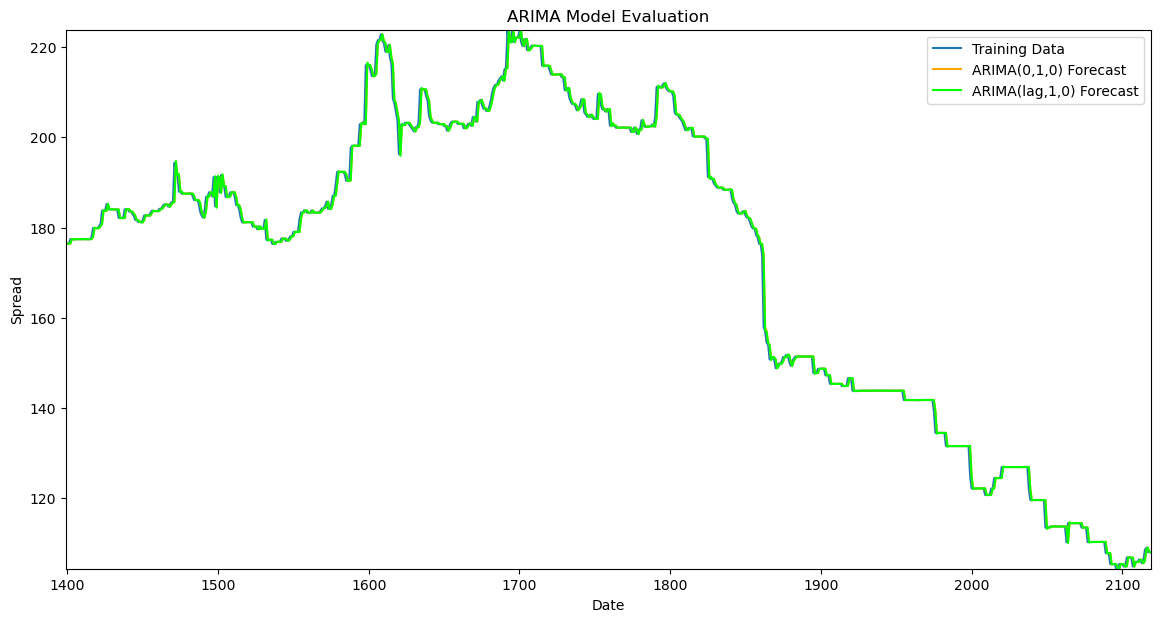

India_8

Evaluating column: India_8
Time interval:  2018-02-16 - 2020-03-17
India_8_2018-02-16 - 2020-03-17 ARIMA(0,1,0) Metrics:
RMSE: 3.0395, MAE: 1.3278, MAPE: 1.2917
India_8_2018-02-16 - 2020-03-17 ARIMA(1,1,0) Metrics:
RMSE: 2.6511, MAE: 1.2032, MAPE: 1.1840
Better model for India_8_2018-02-16 - 2020-03-17: ARIMA(1,1,0)


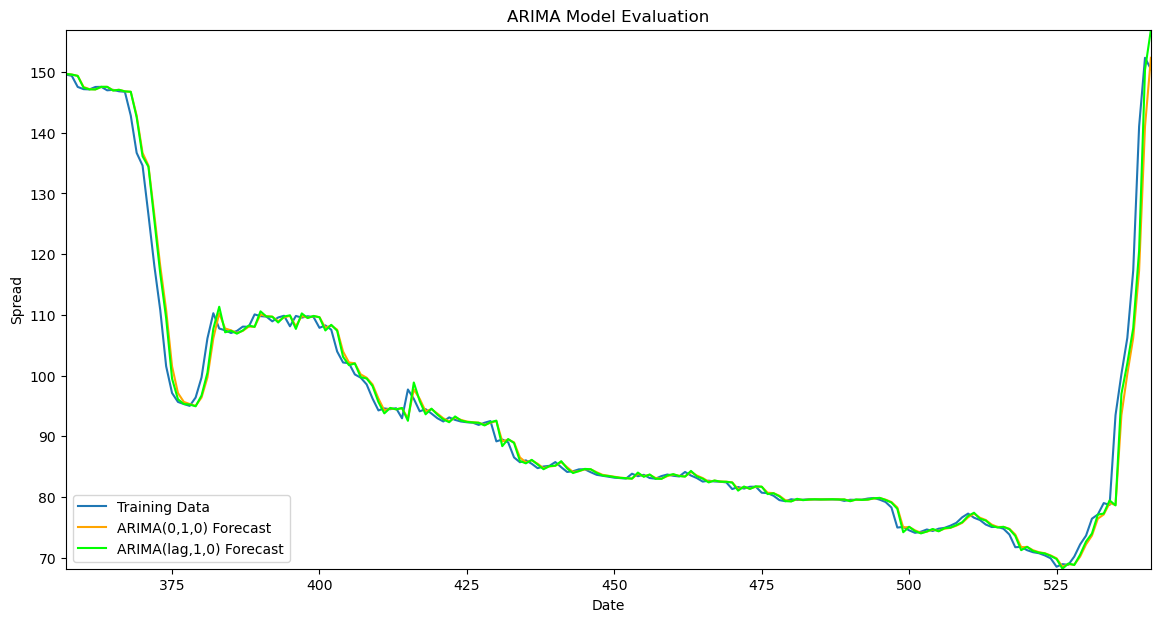

India_8

Evaluating column: India_8
Time interval:  2020-03-17 - 2023-11-02
India_8_2020-03-17 - 2023-11-02 ARIMA(0,1,0) Metrics:
RMSE: 2.9550, MAE: 0.3951, MAPE: 0.3492
India_8_2020-03-17 - 2023-11-02 ARIMA(1,1,0) Metrics:
RMSE: 3.1728, MAE: 0.5266, MAPE: 0.4644
Better model for India_8_2020-03-17 - 2023-11-02: ARIMA(0,1,0)


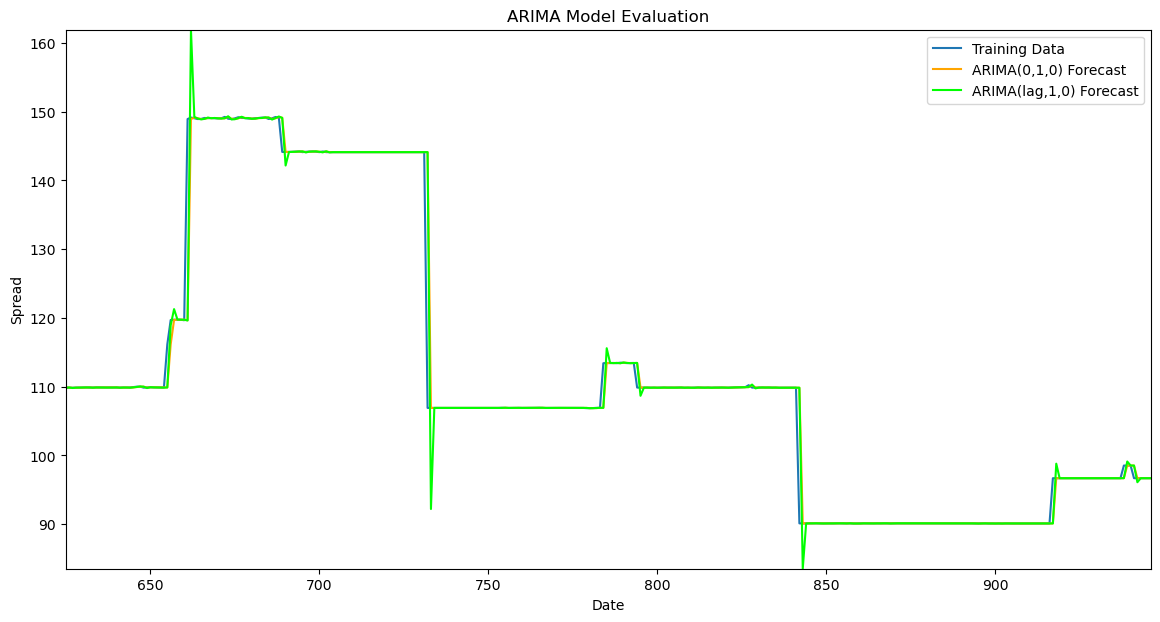

India_36
India_36

Evaluating column: India_36
Time interval:  2010-01-01 - 2012-05-31
India_36_2010-01-01 - 2012-05-31 ARIMA(0,1,0) Metrics:
RMSE: 16.6023, MAE: 8.3061, MAPE: 2.7423
India_36_2010-01-01 - 2012-05-31 ARIMA(1,1,0) Metrics:
RMSE: 16.6241, MAE: 8.3718, MAPE: 2.7659
Better model for India_36_2010-01-01 - 2012-05-31: ARIMA(0,1,0)


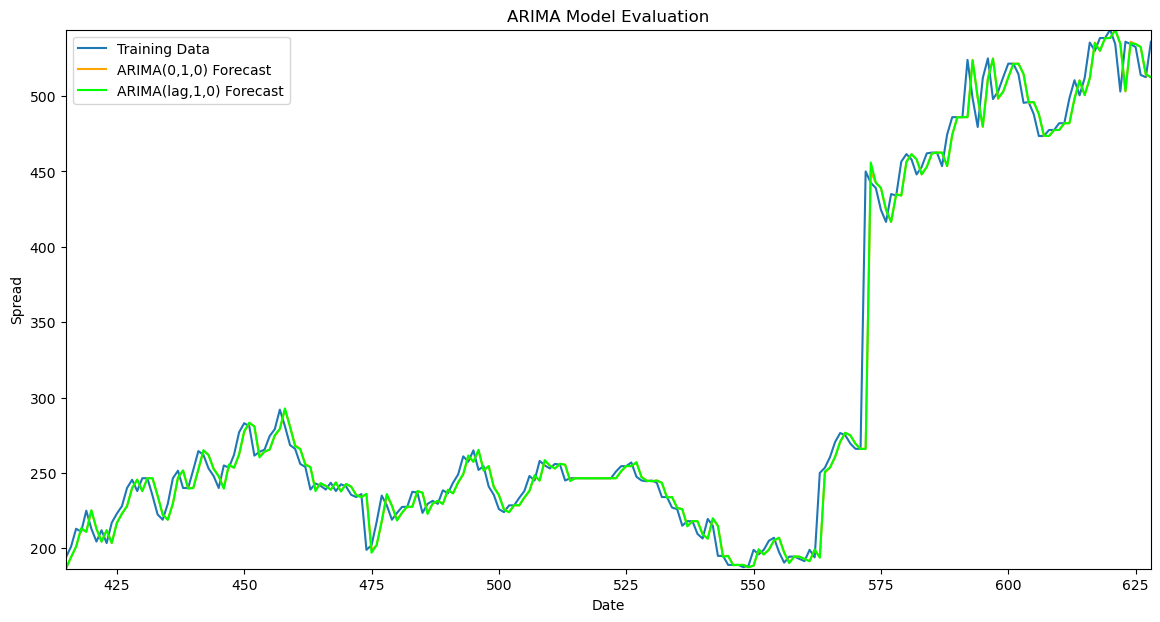

India_36

Evaluating column: India_36
Time interval:  2012-05-31 - 2014-09-23
India_36_2012-05-31 - 2014-09-23 ARIMA(0,1,0) Metrics:
RMSE: 2.6004, MAE: 1.6553, MAPE: 0.7550
India_36_2012-05-31 - 2014-09-23 ARIMA(1,1,0) Metrics:
RMSE: 2.6000, MAE: 1.6567, MAPE: 0.7556
Better model for India_36_2012-05-31 - 2014-09-23: ARIMA(0,1,0)


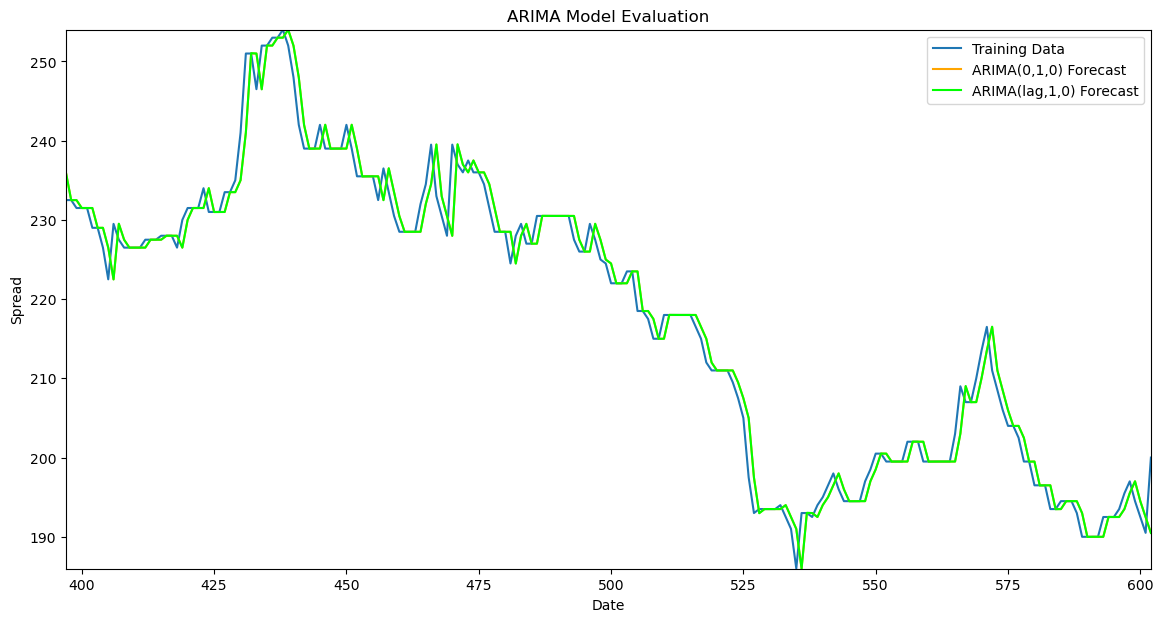

India_36

Evaluating column: India_36
Time interval:  2014-09-23 - 2023-06-07
India_36_2014-09-23 - 2023-06-07 ARIMA(0,1,0) Metrics:
RMSE: 3.1842, MAE: 1.6999, MAPE: 0.8355
India_36_2014-09-23 - 2023-06-07 ARIMA(1,1,0) Metrics:
RMSE: 3.1430, MAE: 1.7337, MAPE: 0.8540
Better model for India_36_2014-09-23 - 2023-06-07: ARIMA(0,1,0)


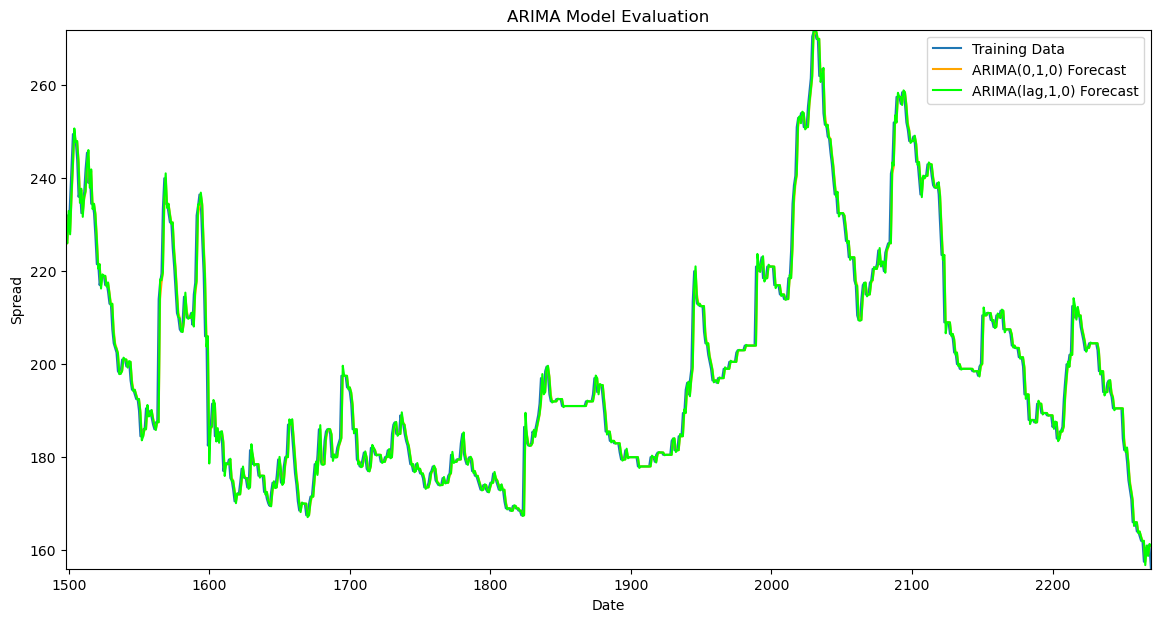

India_40
India_40

Evaluating column: India_40
Time interval:  2010-01-01 - 2013-01-04
India_40_2010-01-01 - 2013-01-04 ARIMA(0,1,0) Metrics:
RMSE: 6.4565, MAE: 2.2027, MAPE: 0.7116
India_40_2010-01-01 - 2013-01-04 ARIMA(1,1,0) Metrics:
RMSE: 6.4621, MAE: 2.2197, MAPE: 0.7170
Better model for India_40_2010-01-01 - 2013-01-04: ARIMA(0,1,0)


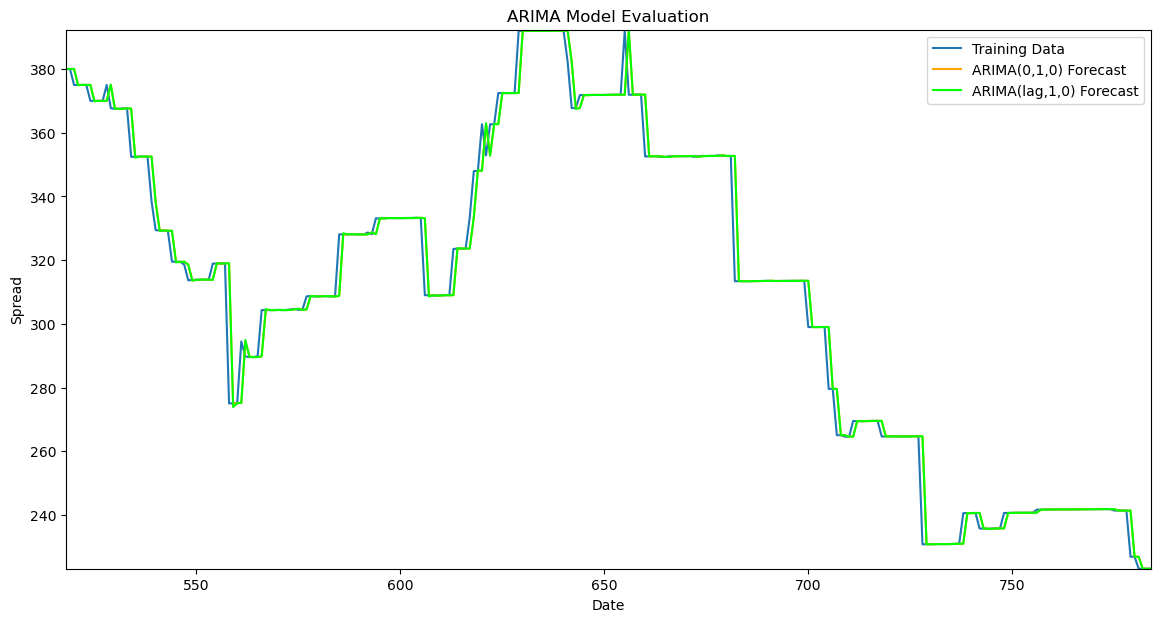

India_40

Evaluating column: India_40
Time interval:  2013-01-04 - 2021-04-15
India_40_2013-01-04 - 2021-04-15 ARIMA(0,1,0) Metrics:
RMSE: 3.4203, MAE: 1.1498, MAPE: 1.0149
India_40_2013-01-04 - 2021-04-15 ARIMA(1,1,0) Metrics:
RMSE: 3.3644, MAE: 1.1270, MAPE: 0.9970
Better model for India_40_2013-01-04 - 2021-04-15: ARIMA(1,1,0)


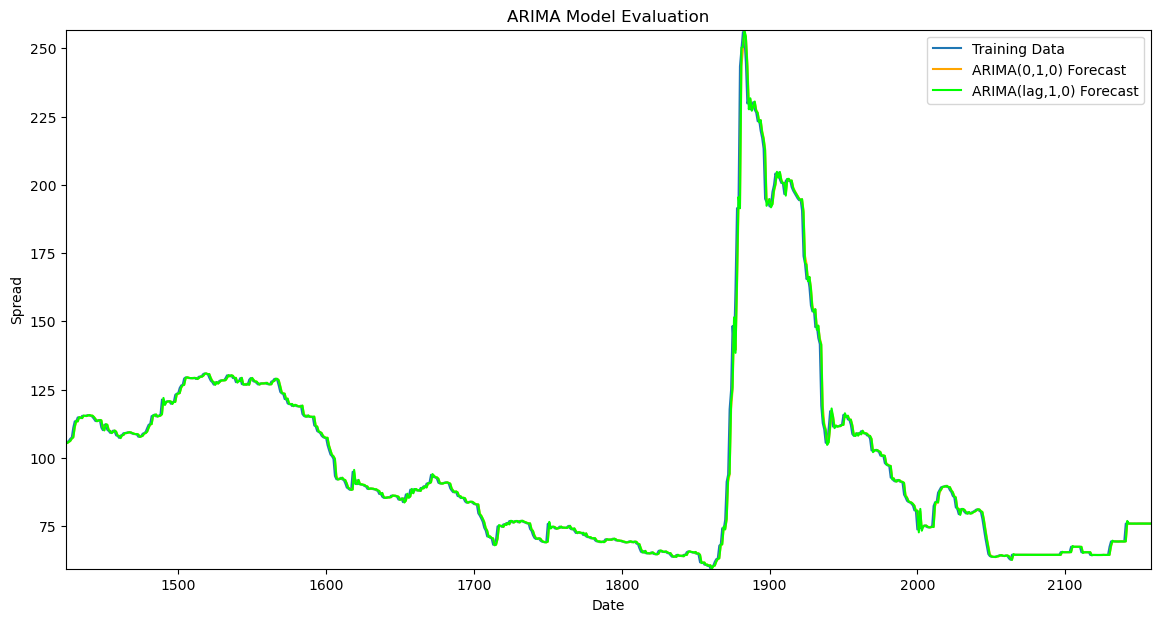

India_40

Evaluating column: India_40
Time interval:  2021-04-15 - 2024-01-18
India_40_2021-04-15 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 1.6440, MAE: 0.5922, MAPE: 0.8648
India_40_2021-04-15 - 2024-01-18 ARIMA(1,1,0) Metrics:
RMSE: 1.6932, MAE: 0.6783, MAPE: 0.9922
Better model for India_40_2021-04-15 - 2024-01-18: ARIMA(0,1,0)


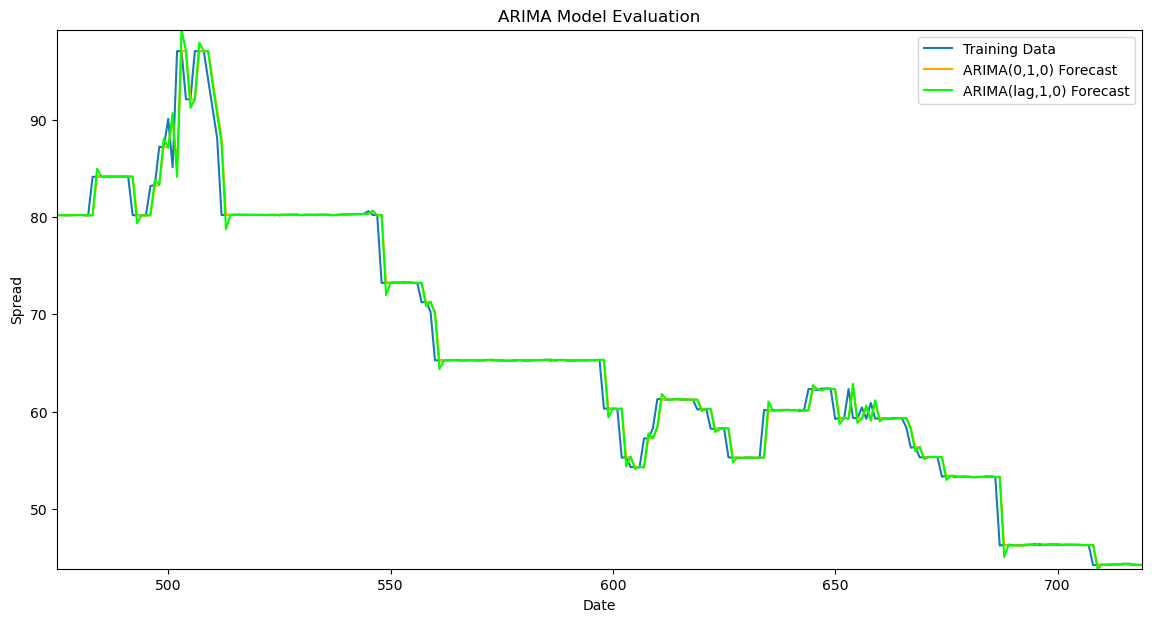

India_67
India_67

Evaluating column: India_67
Time interval:  2010-01-01 - 2012-05-30
India_67_2010-01-01 - 2012-05-30 ARIMA(0,1,0) Metrics:
RMSE: 7.8568, MAE: 5.2868, MAPE: 1.3648
India_67_2010-01-01 - 2012-05-30 ARIMA(1,1,0) Metrics:
RMSE: 7.9668, MAE: 5.4836, MAPE: 1.4178
Better model for India_67_2010-01-01 - 2012-05-30: ARIMA(0,1,0)


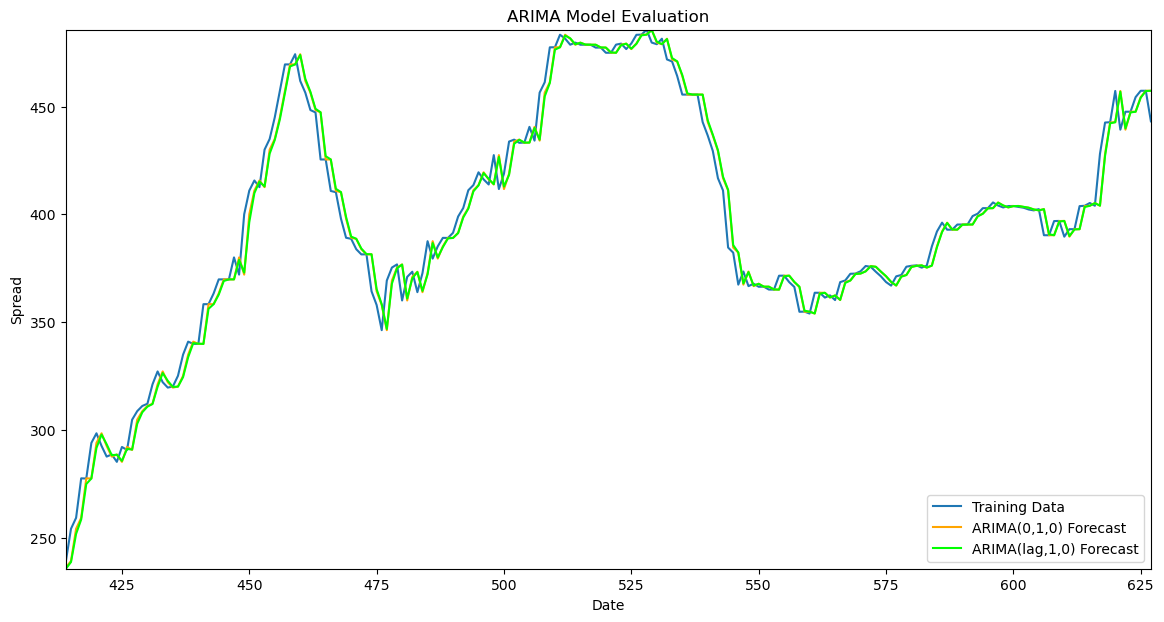

India_67

Evaluating column: India_67
Time interval:  2012-05-30 - 2020-03-10
India_67_2012-05-30 - 2020-03-10 ARIMA(0,1,0) Metrics:
RMSE: 1.4986, MAE: 0.8026, MAPE: 0.7363
India_67_2012-05-30 - 2020-03-10 ARIMA(1,1,0) Metrics:
RMSE: 1.4799, MAE: 0.8119, MAPE: 0.7433
Better model for India_67_2012-05-30 - 2020-03-10: ARIMA(0,1,0)


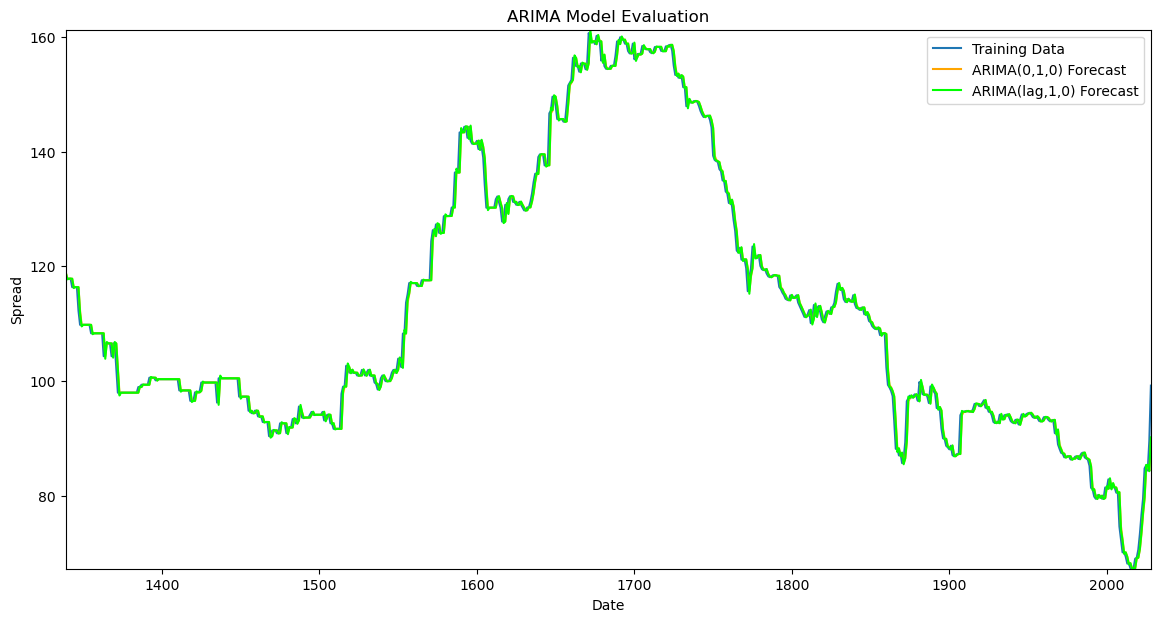

India_67

Evaluating column: India_67
Time interval:  2020-03-10 - 2024-01-18
India_67_2020-03-10 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 2.8427, MAE: 0.5937, MAPE: 0.6499
India_67_2020-03-10 - 2024-01-18 ARIMA(1,1,0) Metrics:
RMSE: 2.9053, MAE: 0.7095, MAPE: 0.7762
Better model for India_67_2020-03-10 - 2024-01-18: ARIMA(0,1,0)


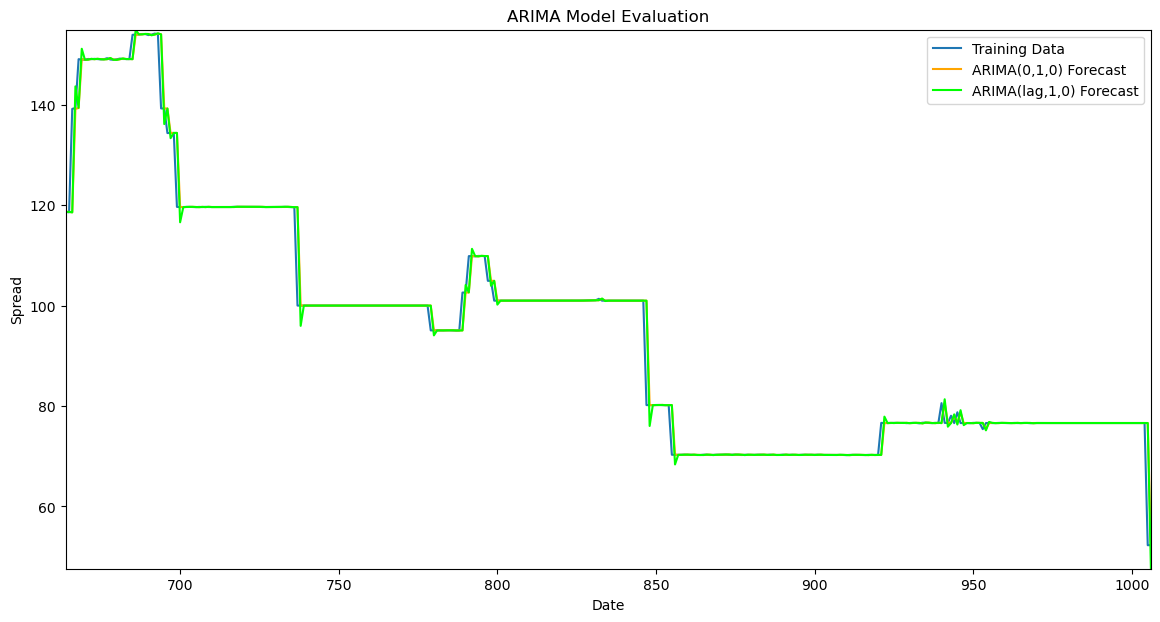

India_69
India_69

Evaluating column: India_69
Time interval:  2010-01-01 - 2012-01-23
India_69_2010-01-01 - 2012-01-23 ARIMA(0,1,0) Metrics:
RMSE: 7.1914, MAE: 4.7815, MAPE: 1.3596
India_69_2010-01-01 - 2012-01-23 ARIMA(1,1,0) Metrics:
RMSE: 7.3224, MAE: 5.0181, MAPE: 1.4328
Better model for India_69_2010-01-01 - 2012-01-23: ARIMA(0,1,0)


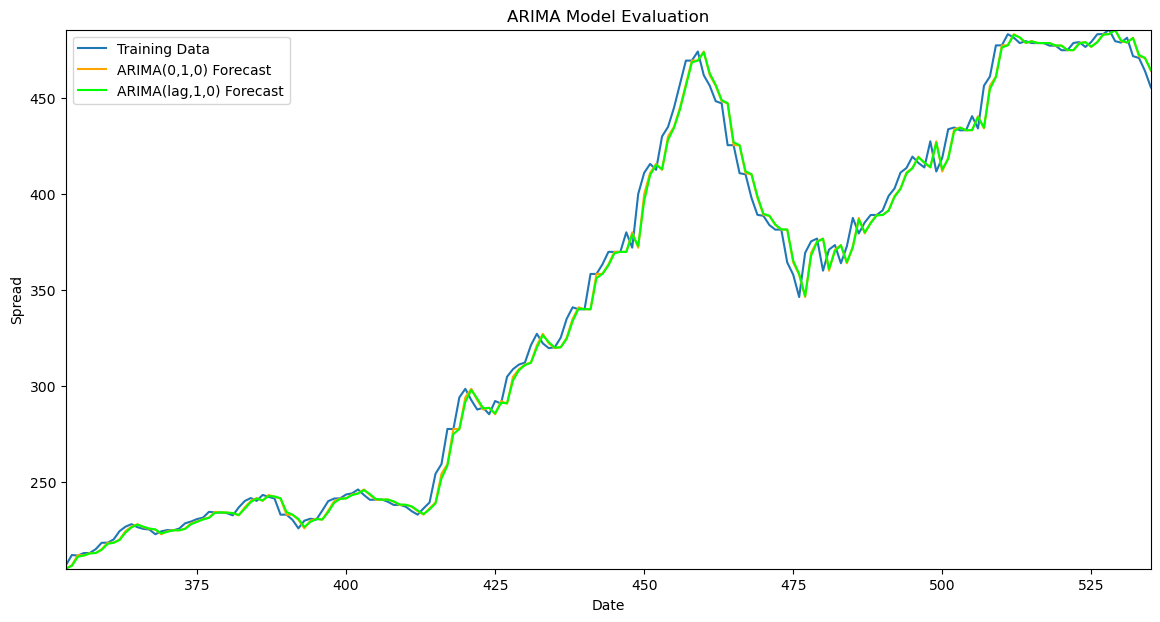

India_69

Evaluating column: India_69
Time interval:  2012-01-23 - 2020-03-10
India_69_2012-01-23 - 2020-03-10 ARIMA(0,1,0) Metrics:
RMSE: 1.5670, MAE: 0.7735, MAPE: 0.7251
India_69_2012-01-23 - 2020-03-10 ARIMA(1,1,0) Metrics:
RMSE: 1.5503, MAE: 0.7848, MAPE: 0.7341
Better model for India_69_2012-01-23 - 2020-03-10: ARIMA(0,1,0)


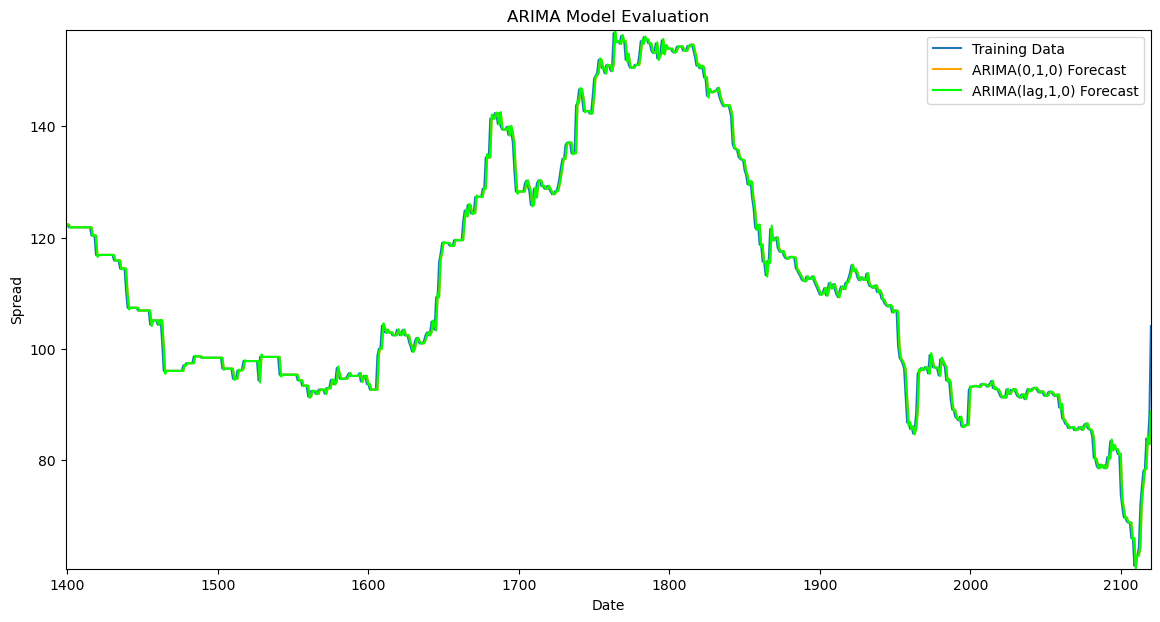

India_69

Evaluating column: India_69
Time interval:  2020-03-10 - 2023-10-10
India_69_2020-03-10 - 2023-10-10 ARIMA(0,1,0) Metrics:
RMSE: 4.0864, MAE: 2.0154, MAPE: 2.0293
India_69_2020-03-10 - 2023-10-10 ARIMA(1,1,0) Metrics:
RMSE: 4.2705, MAE: 2.1142, MAPE: 2.1396
Better model for India_69_2020-03-10 - 2023-10-10: ARIMA(0,1,0)


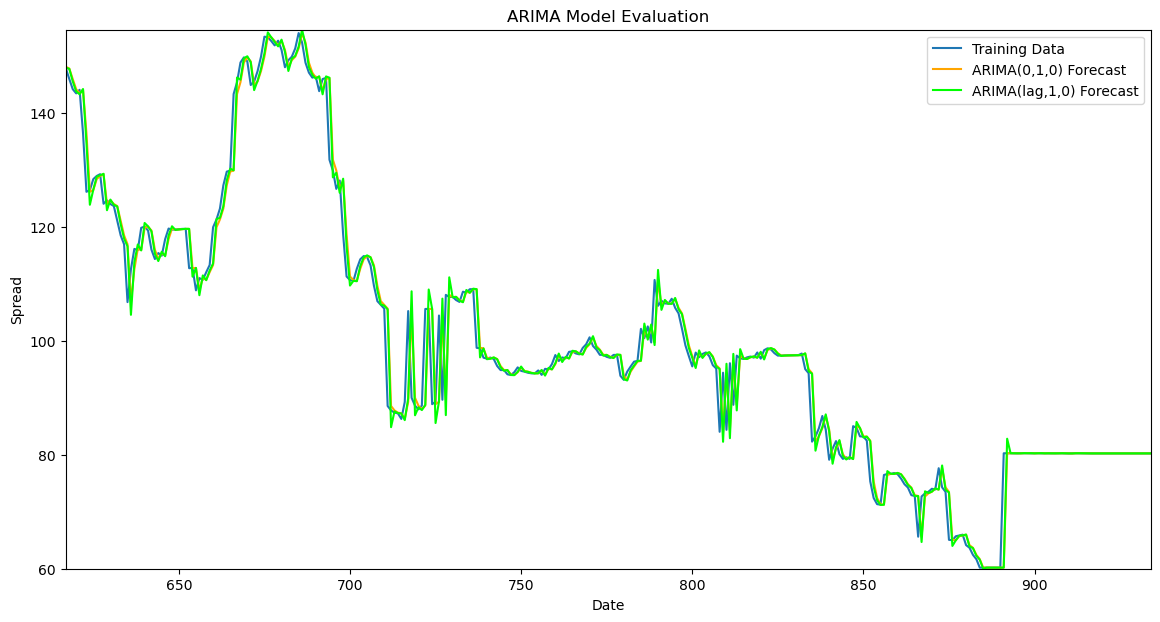

India_124
India_124

Evaluating column: India_124
Time interval:  2010-01-01 - 2018-02-20
India_124_2010-01-01 - 2018-02-20 ARIMA(0,1,0) Metrics:
RMSE: 0.8554, MAE: 0.4688, MAPE: 0.9527
India_124_2010-01-01 - 2018-02-20 ARIMA(1,1,0) Metrics:
RMSE: 0.8497, MAE: 0.4756, MAPE: 0.9679
Better model for India_124_2010-01-01 - 2018-02-20: ARIMA(0,1,0)


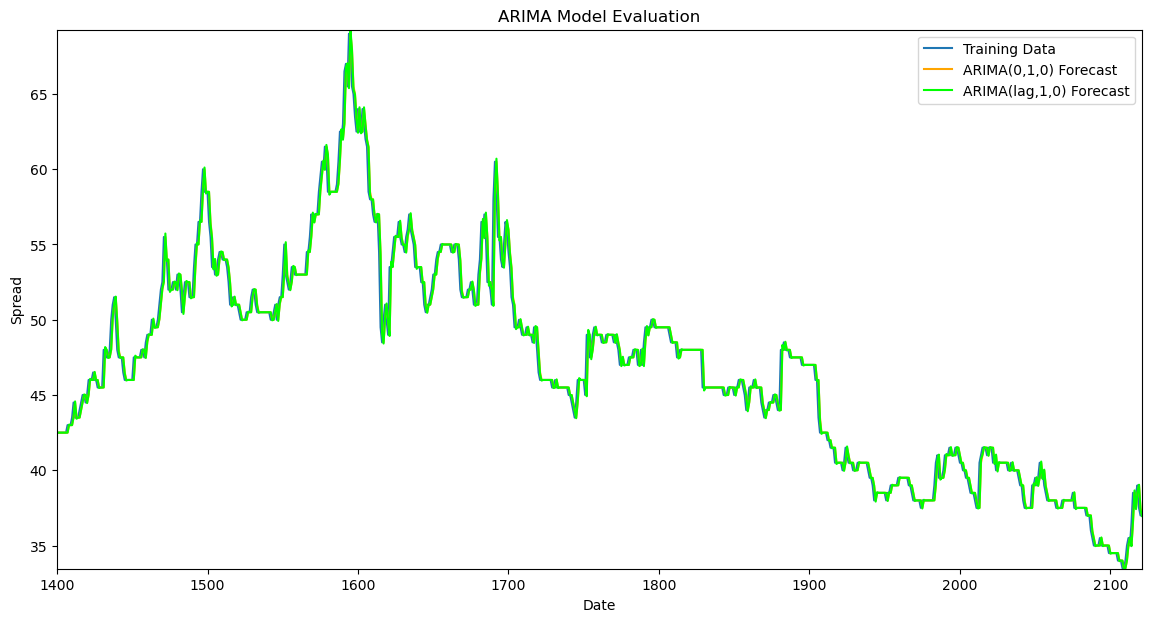

India_124

Evaluating column: India_124
Time interval:  2018-02-20 - 2020-03-05
India_124_2018-02-20 - 2020-03-05 ARIMA(0,1,0) Metrics:
RMSE: 0.7168, MAE: 0.4033, MAPE: 1.2057
India_124_2018-02-20 - 2020-03-05 ARIMA(1,1,0) Metrics:
RMSE: 0.6925, MAE: 0.4053, MAPE: 1.2166
Better model for India_124_2018-02-20 - 2020-03-05: ARIMA(0,1,0)


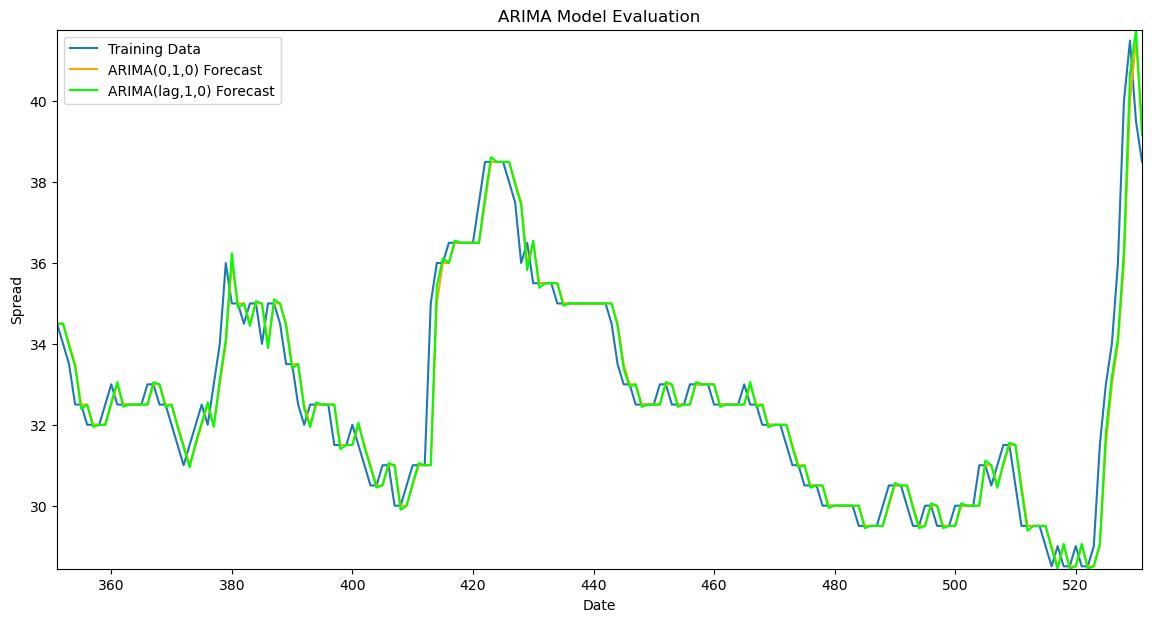

India_124

Evaluating column: India_124
Time interval:  2020-03-05 - 2023-06-05
India_124_2020-03-05 - 2023-06-05 ARIMA(0,1,0) Metrics:
RMSE: 0.9091, MAE: 0.4792, MAPE: 1.1129
India_124_2020-03-05 - 2023-06-05 ARIMA(1,1,0) Metrics:
RMSE: 0.9157, MAE: 0.4911, MAPE: 1.1392
Better model for India_124_2020-03-05 - 2023-06-05: ARIMA(0,1,0)


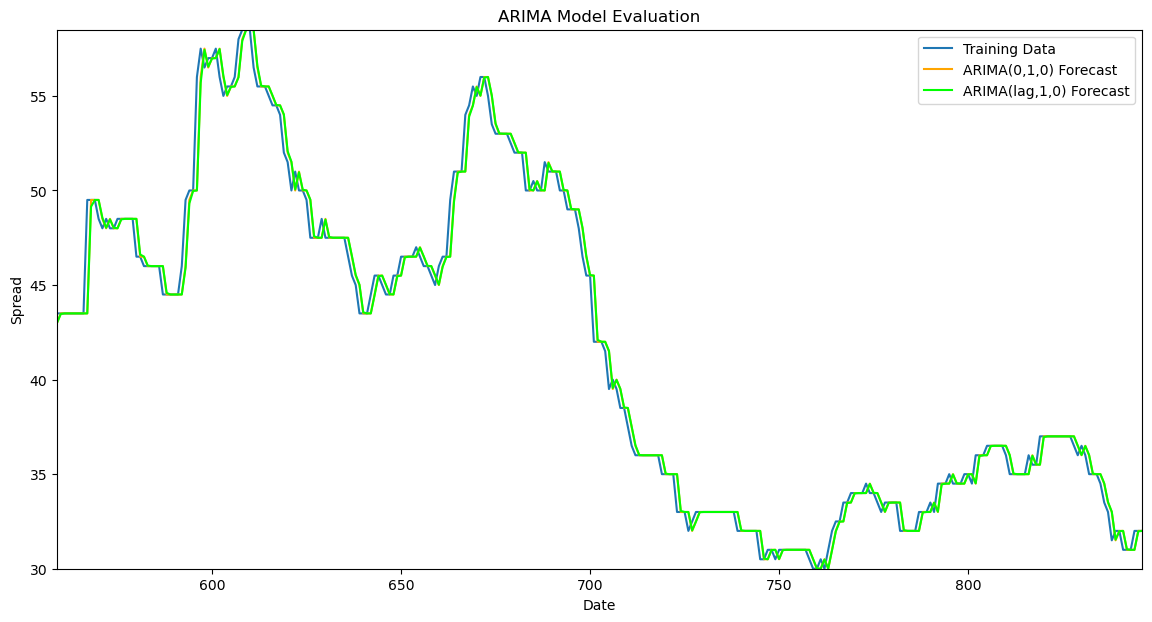

India_136
India_136

Evaluating column: India_136
Time interval:  2010-01-01 - 2013-11-14
India_136_2010-01-01 - 2013-11-14 ARIMA(0,1,0) Metrics:
RMSE: 4.1627, MAE: 2.9578, MAPE: 2.2459
India_136_2010-01-01 - 2013-11-14 ARIMA(1,1,0) Metrics:
RMSE: 4.1616, MAE: 2.9639, MAPE: 2.2505
Better model for India_136_2010-01-01 - 2013-11-14: ARIMA(0,1,0)


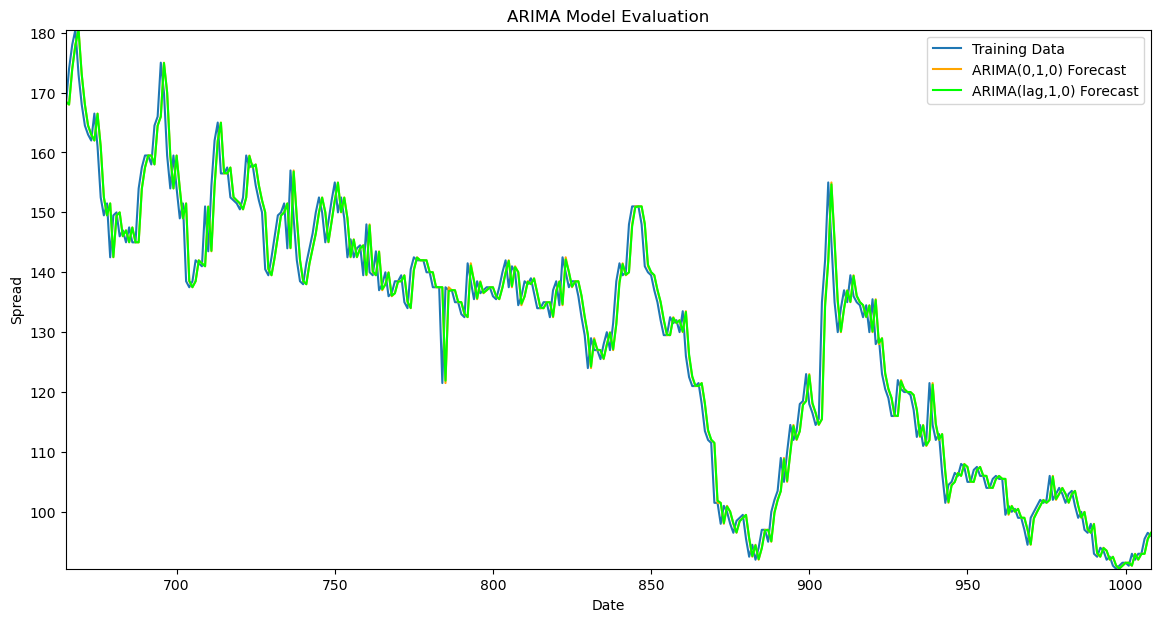

India_136

Evaluating column: India_136
Time interval:  2013-11-14 - 2016-01-01
India_136_2013-11-14 - 2016-01-01 ARIMA(0,1,0) Metrics:
RMSE: 1.7637, MAE: 1.2316, MAPE: 1.4255
India_136_2013-11-14 - 2016-01-01 ARIMA(1,1,0) Metrics:
RMSE: 1.8557, MAE: 1.3426, MAPE: 1.5482
Better model for India_136_2013-11-14 - 2016-01-01: ARIMA(0,1,0)


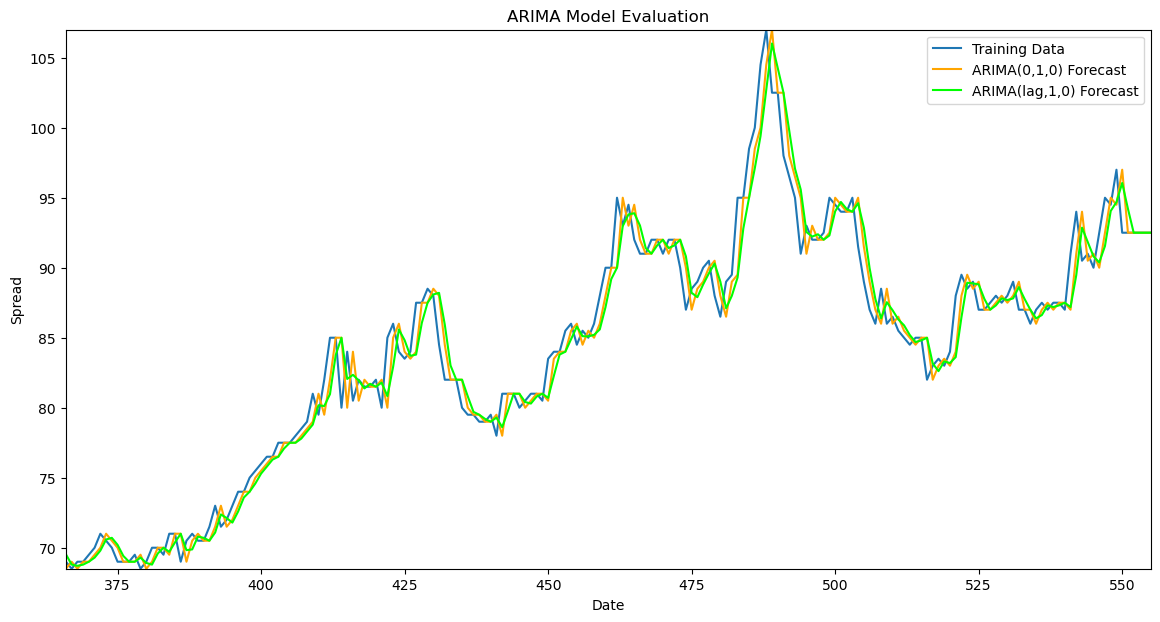

India_136

Evaluating column: India_136
Time interval:  2016-01-01 - 2024-01-18
India_136_2016-01-01 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 1.4428, MAE: 0.6394, MAPE: 1.7286
India_136_2016-01-01 - 2024-01-18 ARIMA(1,1,0) Metrics:
RMSE: 1.4949, MAE: 0.6939, MAPE: 1.8853
Better model for India_136_2016-01-01 - 2024-01-18: ARIMA(0,1,0)


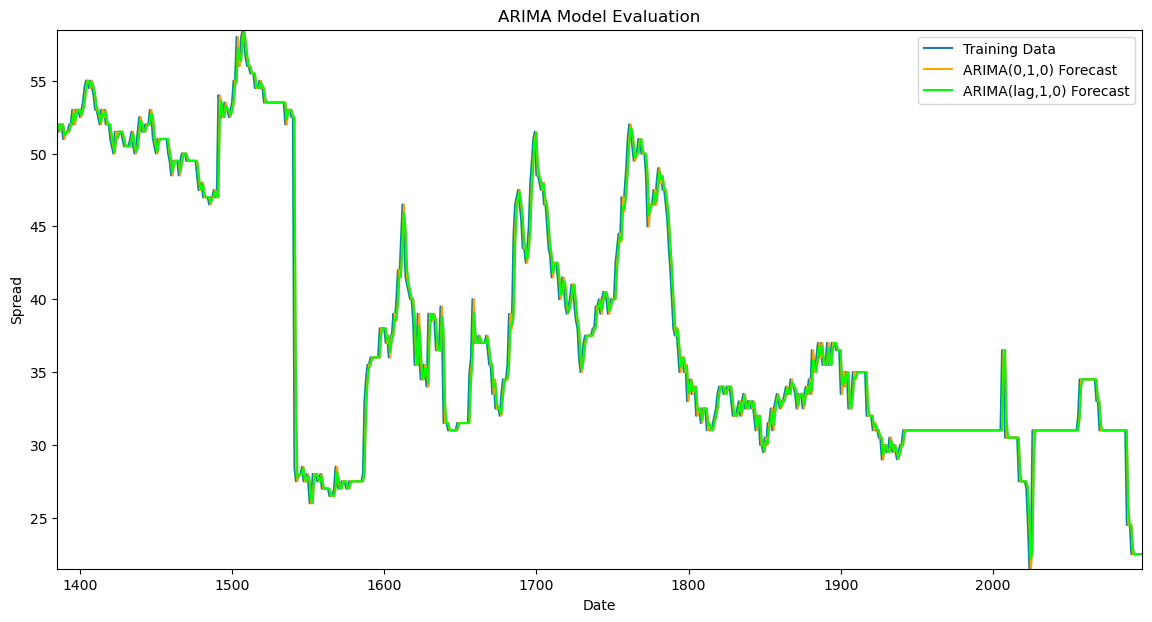

India_153
India_153

Evaluating column: India_153
Time interval:  2010-01-01 - 2013-11-18
India_153_2010-01-01 - 2013-11-18 ARIMA(0,1,0) Metrics:
RMSE: 4.1131, MAE: 2.0096, MAPE: 0.8784
India_153_2010-01-01 - 2013-11-18 ARIMA(1,1,0) Metrics:
RMSE: 4.0756, MAE: 2.0126, MAPE: 0.8812
Better model for India_153_2010-01-01 - 2013-11-18: ARIMA(0,1,0)


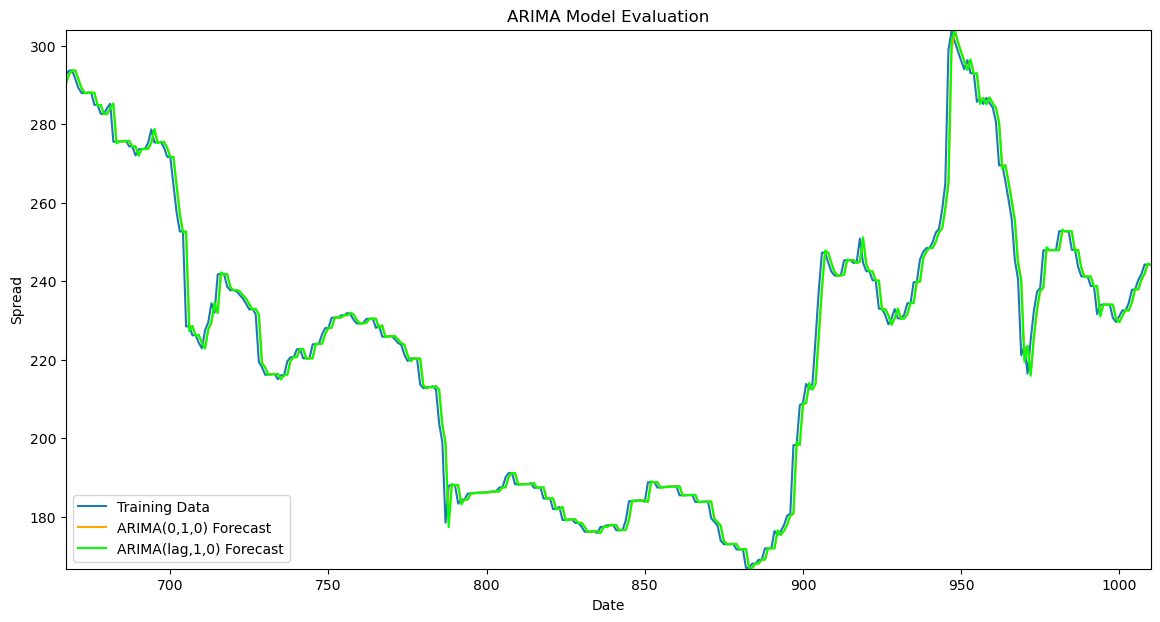

India_153

Evaluating column: India_153
Time interval:  2013-11-18 - 2015-12-28
India_153_2013-11-18 - 2015-12-28 ARIMA(0,1,0) Metrics:
RMSE: 1.7474, MAE: 0.7791, MAPE: 0.4371
India_153_2013-11-18 - 2015-12-28 ARIMA(1,1,0) Metrics:
RMSE: 1.8447, MAE: 0.9538, MAPE: 0.5396
Better model for India_153_2013-11-18 - 2015-12-28: ARIMA(0,1,0)


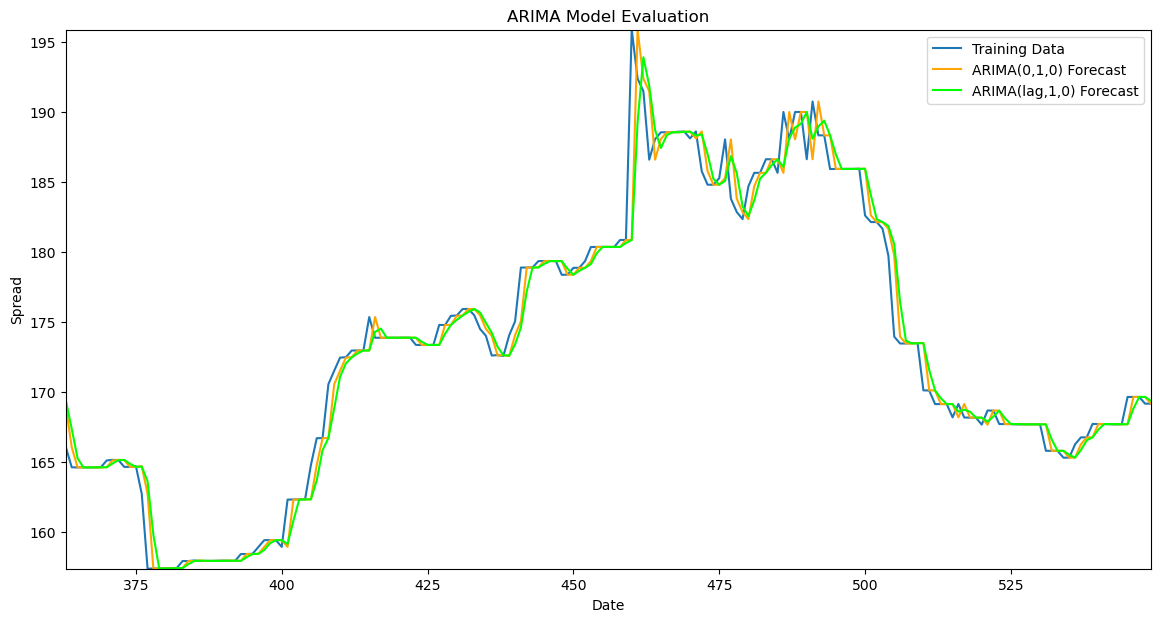

India_153

Evaluating column: India_153
Time interval:  2015-12-28 - 2018-02-06
India_153_2015-12-28 - 2018-02-06 ARIMA(0,1,0) Metrics:
RMSE: 1.1519, MAE: 0.3152, MAPE: 0.3065
India_153_2015-12-28 - 2018-02-06 ARIMA(1,1,0) Metrics:
RMSE: 1.1629, MAE: 0.3412, MAPE: 0.3316
Better model for India_153_2015-12-28 - 2018-02-06: ARIMA(0,1,0)


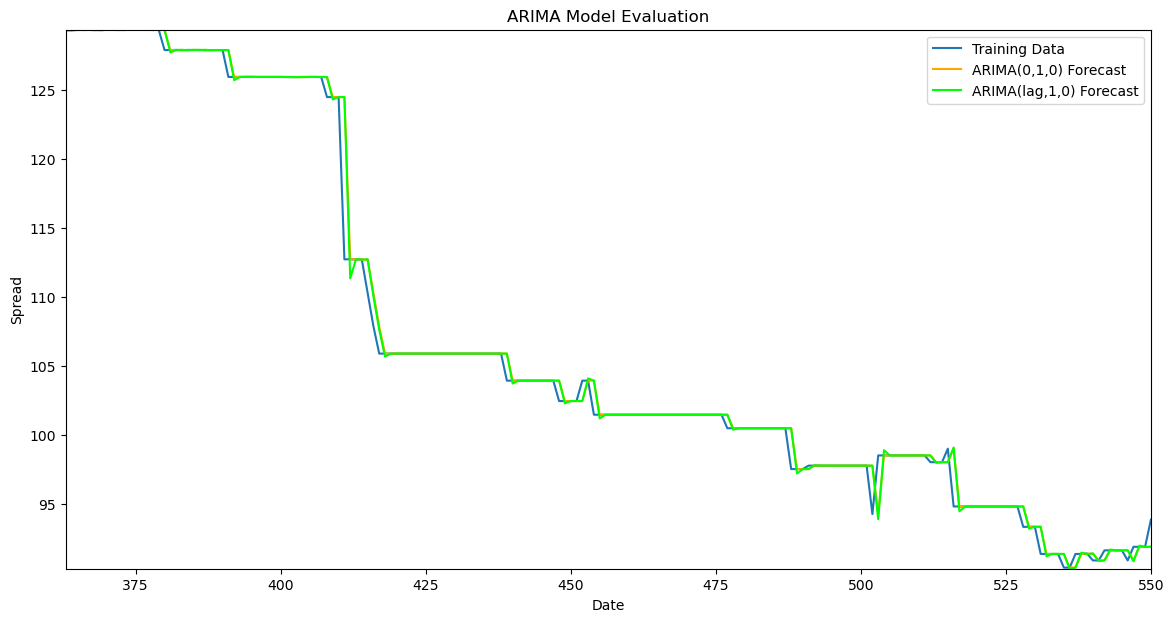

India_153

Evaluating column: India_153
Time interval:  2018-02-06 - 2020-03-17
India_153_2018-02-06 - 2020-03-17 ARIMA(0,1,0) Metrics:
RMSE: 3.0456, MAE: 1.1067, MAPE: 1.1159
India_153_2018-02-06 - 2020-03-17 ARIMA(1,1,0) Metrics:
RMSE: 2.5666, MAE: 0.9542, MAPE: 1.0091
Better model for India_153_2018-02-06 - 2020-03-17: ARIMA(1,1,0)


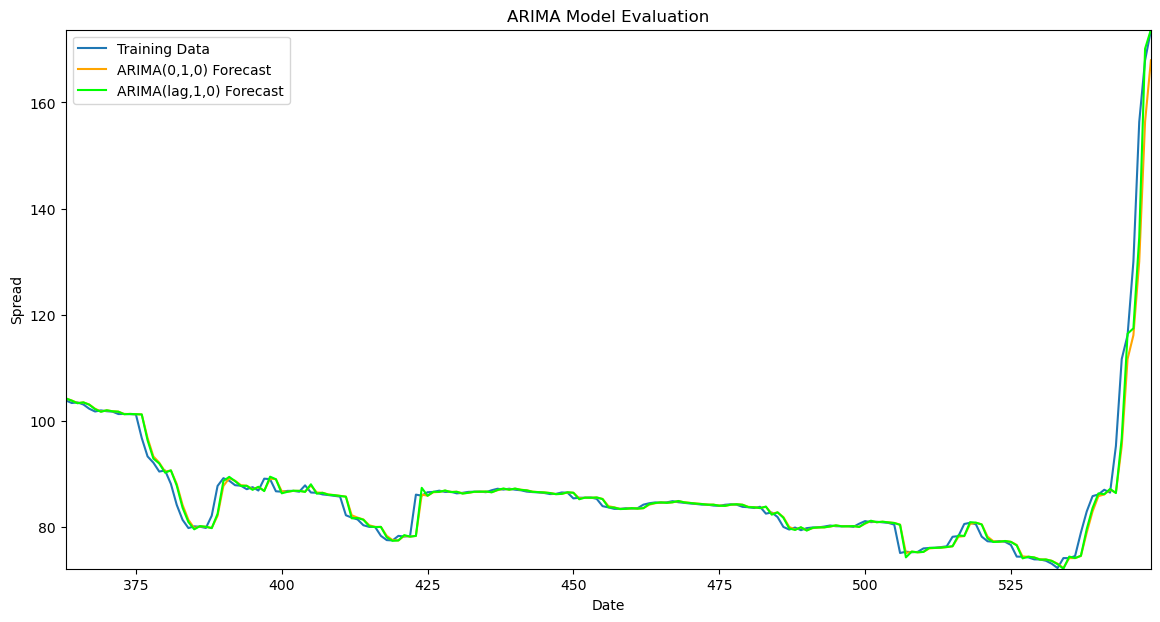

India_153

Evaluating column: India_153
Time interval:  2020-03-17 - 2024-01-18
India_153_2020-03-17 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 2.2567, MAE: 0.8689, MAPE: 0.9350
India_153_2020-03-17 - 2024-01-18 ARIMA(1,1,0) Metrics:
RMSE: 2.3138, MAE: 0.9793, MAPE: 1.0733
Better model for India_153_2020-03-17 - 2024-01-18: ARIMA(0,1,0)


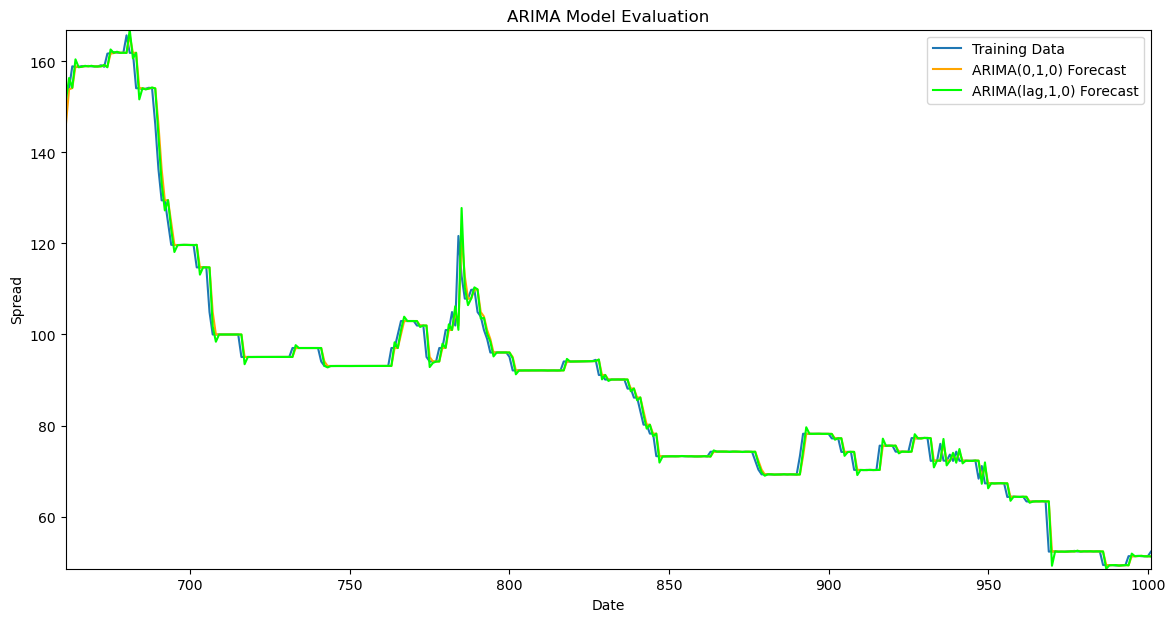

India_160
India_160

Evaluating column: India_160
Time interval:  2010-01-01 - 2015-04-16
India_160_2010-01-01 - 2015-04-16 ARIMA(0,1,0) Metrics:
RMSE: 2.9047, MAE: 1.5650, MAPE: 0.9502
India_160_2010-01-01 - 2015-04-16 ARIMA(1,1,0) Metrics:
RMSE: 2.9386, MAE: 1.6239, MAPE: 0.9845
Better model for India_160_2010-01-01 - 2015-04-16: ARIMA(0,1,0)


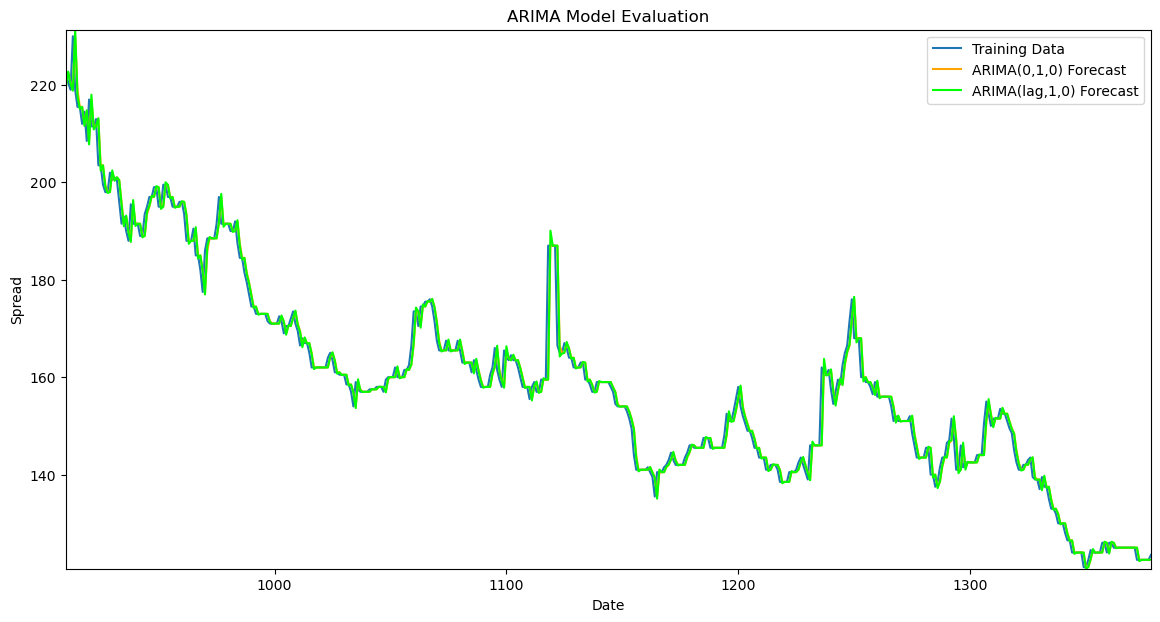

India_160

Evaluating column: India_160
Time interval:  2015-04-16 - 2020-03-05
India_160_2015-04-16 - 2020-03-05 ARIMA(0,1,0) Metrics:
RMSE: 3.1498, MAE: 1.7200, MAPE: 1.4869
India_160_2015-04-16 - 2020-03-05 ARIMA(1,1,0) Metrics:
RMSE: 3.1587, MAE: 1.7691, MAPE: 1.5256
Better model for India_160_2015-04-16 - 2020-03-05: ARIMA(0,1,0)


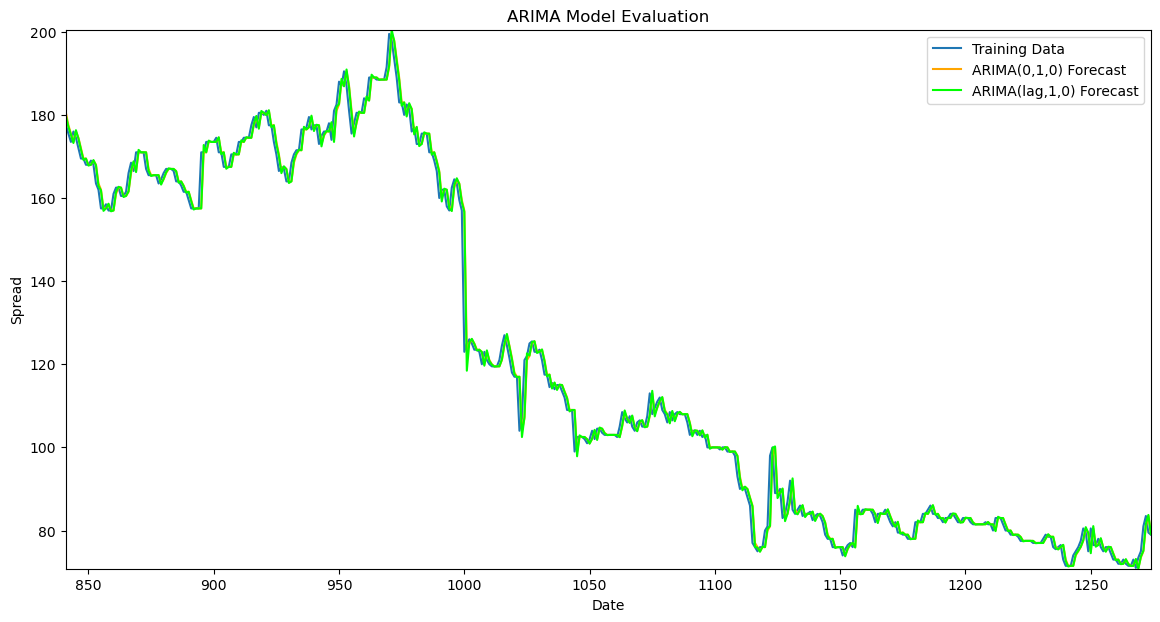

India_160

Evaluating column: India_160
Time interval:  2020-03-05 - 2023-06-05
India_160_2020-03-05 - 2023-06-05 ARIMA(0,1,0) Metrics:
RMSE: 3.0957, MAE: 1.6667, MAPE: 1.5785
India_160_2020-03-05 - 2023-06-05 ARIMA(1,1,0) Metrics:
RMSE: 3.1092, MAE: 1.7124, MAPE: 1.6203
Better model for India_160_2020-03-05 - 2023-06-05: ARIMA(0,1,0)


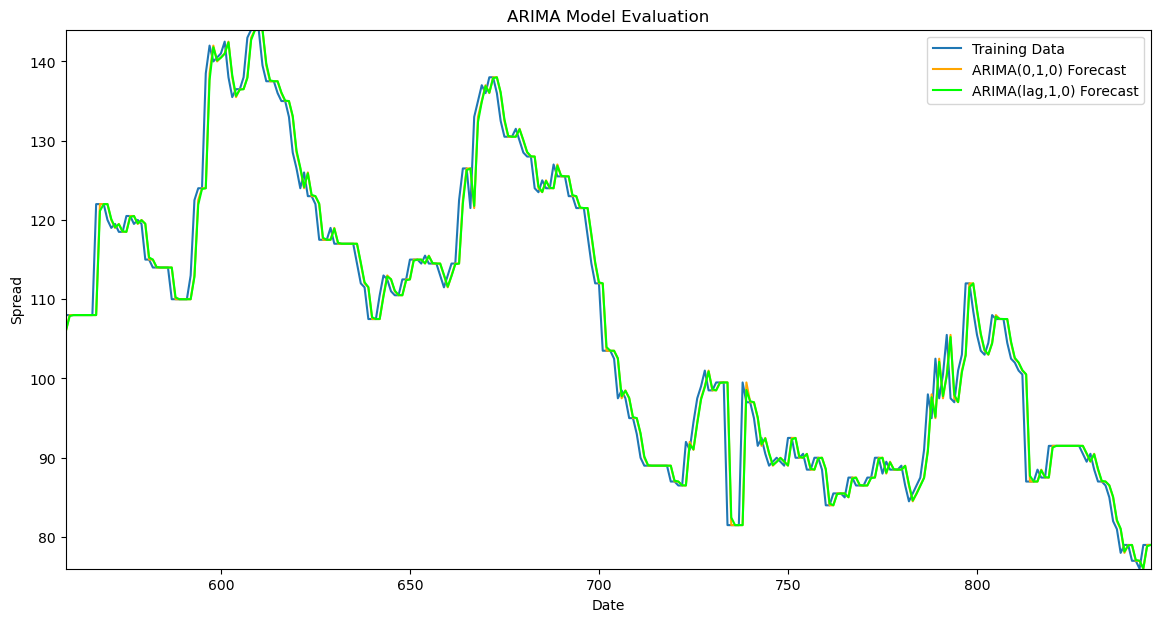

India_172
India_172

Evaluating column: India_172
Time interval:  2011-03-18 - 2018-02-28
India_172_2011-03-18 - 2018-02-28 ARIMA(0,1,0) Metrics:
RMSE: 1.1977, MAE: 0.5184, MAPE: 0.3747
India_172_2011-03-18 - 2018-02-28 ARIMA(1,1,0) Metrics:
RMSE: 1.1896, MAE: 0.5329, MAPE: 0.3860
Better model for India_172_2011-03-18 - 2018-02-28: ARIMA(0,1,0)


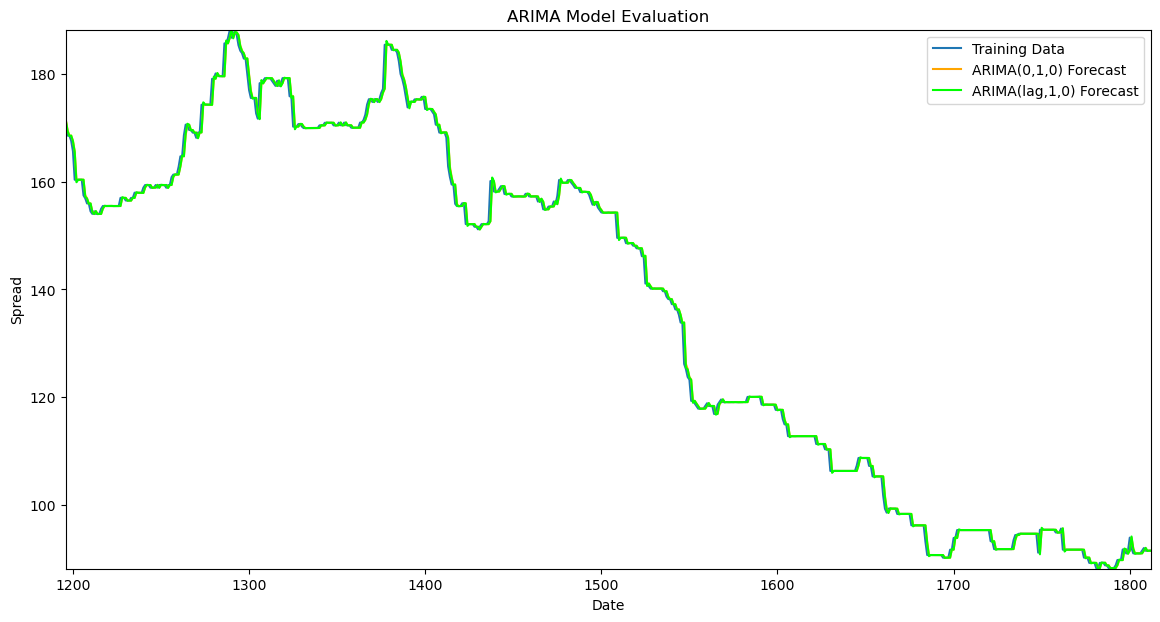

India_172

Evaluating column: India_172
Time interval:  2018-02-28 - 2020-02-03
India_172_2018-02-28 - 2020-02-03 ARIMA(0,1,0) Metrics:
RMSE: 1.2751, MAE: 0.6124, MAPE: 0.7186
India_172_2018-02-28 - 2020-02-03 ARIMA(1,1,0) Metrics:
RMSE: 1.2743, MAE: 0.6092, MAPE: 0.7141
Better model for India_172_2018-02-28 - 2020-02-03: ARIMA(1,1,0)


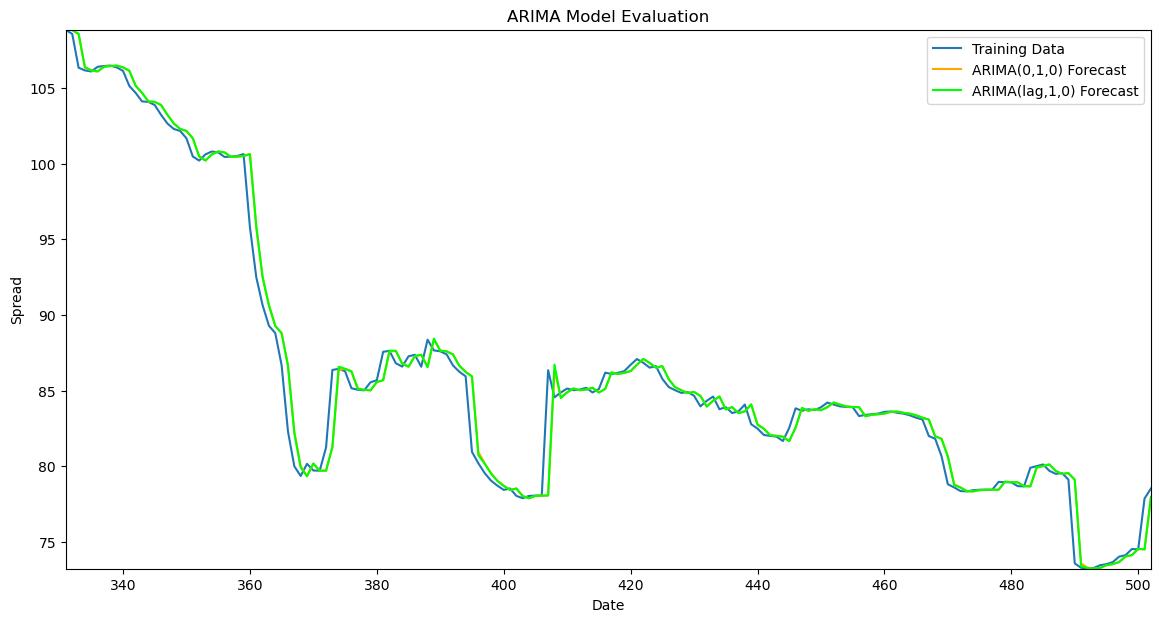

India_172

Evaluating column: India_172
Time interval:  2020-02-03 - 2024-01-18
India_172_2020-02-03 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 2.6115, MAE: 1.0671, MAPE: 1.1197
India_172_2020-02-03 - 2024-01-18 ARIMA(1,1,0) Metrics:
RMSE: 2.7648, MAE: 1.2295, MAPE: 1.3172
Better model for India_172_2020-02-03 - 2024-01-18: ARIMA(0,1,0)


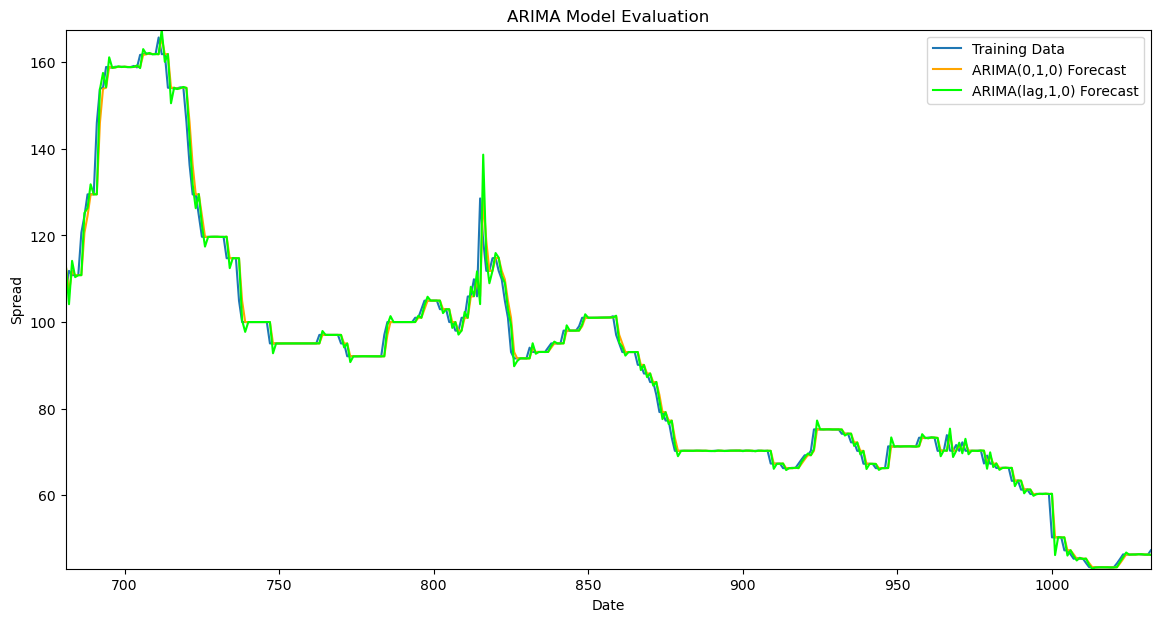

India_199
India_199

Evaluating column: India_199
Time interval:  2014-10-07 - 2015-06-25
India_199_2014-10-07 - 2015-06-25 ARIMA(0,1,0) Metrics:
RMSE: 2.9014, MAE: 2.1172, MAPE: 1.2413
India_199_2014-10-07 - 2015-06-25 ARIMA(1,1,0) Metrics:
RMSE: 2.9029, MAE: 2.1664, MAPE: 1.2711
Better model for India_199_2014-10-07 - 2015-06-25: ARIMA(0,1,0)


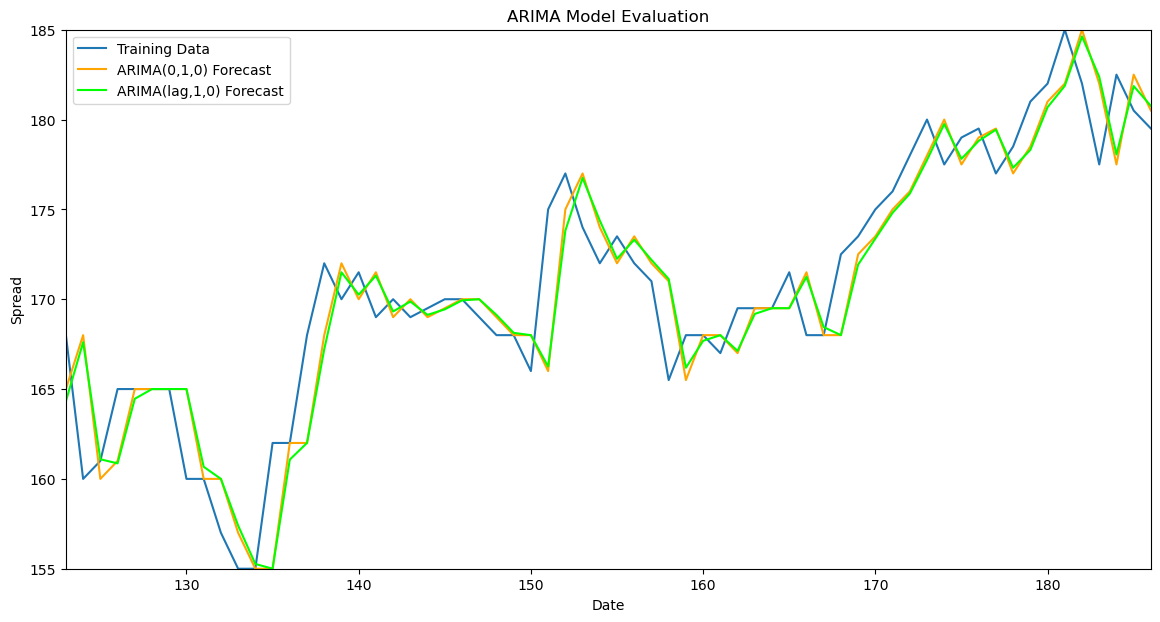

India_199

Evaluating column: India_199
Time interval:  2015-06-25 - 2024-01-18
India_199_2015-06-25 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 7.9721, MAE: 2.1803, MAPE: 2.0596
India_199_2015-06-25 - 2024-01-18 ARIMA(1,1,0) Metrics:
RMSE: 7.9608, MAE: 2.2115, MAPE: 2.0877
Better model for India_199_2015-06-25 - 2024-01-18: ARIMA(0,1,0)


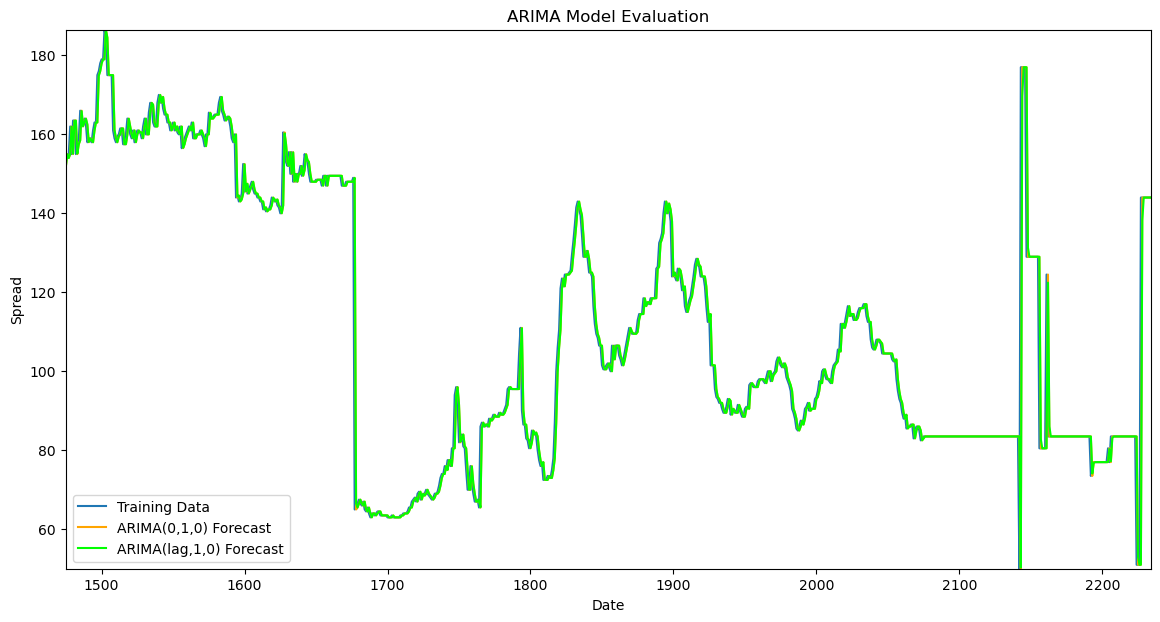

In [7]:
# Function to calculate MAPE
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Dictionaries to store fitted models and forecasts for each column
all_fitted_models = {}
all_forecasts = {}

# Create an empty DataFrame to store metrics
#metrics_df = pd.DataFrame(columns=['Column', 'Model', 'RMSE', 'MAE', 'MAPE'])
metrics_df = []

for company in df.columns[1:12]:
    print(company)
    shortcol = df[[company, "Date"]].dropna().reset_index()
    intervals = list(breaksdf2[company].dropna())
    intervals.append(shortcol.iloc[-1]["Date"])
    
    strartinterval = 0
    
    # Iterate over columns and compare models
    for interval in range(len(intervals)):
        
        if (intervals[interval] in list(shortcol["Date"])) is False:
            continue
        
        
        column = company ### 
        if column in chosen_lags:
            print(f"\nEvaluating column: {column}")
            
            
            intervalindex = int(shortcol[shortcol['Date'] == intervals[interval]].index.values)
            series = shortcol[strartinterval:intervalindex][company]
            
            #series = df[column]
            
            
            interval_name = str(shortcol["Date"][strartinterval])[:10] + " - " + str(intervals[interval])[:10]
            column_name = column + "_" + interval_name

            # Function to evaluate and compare models
            start_index = series.first_valid_index()
            end_index = series.last_valid_index()
            series = series.loc[start_index:end_index]
            series = series.reset_index(drop=True)
            size = int(len(series) * 0.66)
            train, test = series[0:size], series[size:len(series)]
            history = [x for x in train]


            rw_predictions = list()
            arima_predictions = list()
            test_data = list(test)

            # Walk-forward validation
            for t in range(len(test)):
                # Evaluate ARIMA(0,1,0) model
                rw_model = ARIMA(history, order=(0, 1, 0))
                rw_model_fit = rw_model.fit()
                rw_output = rw_model_fit.forecast()
                rw_yhat = rw_output[0]
                rw_predictions.append(rw_yhat)

                # Evaluate ARIMA(x,1,0) model
                lag = chosen_lags.get(column_name, 1)  # Default lag is 1 if not found in dictionary
                arima_model = ARIMA(history, order=(lag, 1, 0))
                arima_model_fit = arima_model.fit()
                arima_output = arima_model_fit.forecast()
                arima_yhat = arima_output[0]
                arima_predictions.append(arima_yhat)

                obs = test[t+len(train)]
                history.append(obs)

            # Evaluate forecasts
            rw_rmse = sqrt(mean_squared_error(test, rw_predictions))
            arima_rmse = sqrt(mean_squared_error(test, arima_predictions))
            rw_mae = mean_absolute_error(test, rw_predictions)
            arima_mae = mean_absolute_error(test, arima_predictions)
            rw_mape = mape(test, rw_predictions)
            arima_mape = mape(test, arima_predictions)

            # Inside the compare_models function, after calculating metrics
            metrics_df.append({
                'Column': column_name,
                'Interval': interval_name,
                'Model': 'ARIMA(0,1,0)',
                'RMSE': rw_rmse,
                'MAE': rw_mae,
                'MAPE': rw_mape
            })

            metrics_df.append({
                'Column': column_name,
                'Interval': interval_name,
                'Model': f'ARIMA({lag},1,0)',
                'RMSE': arima_rmse,
                'MAE': arima_mae,
                'MAPE': arima_mape
            })

            # Compare models
            rw_better_count = 0
            arima_better_count = 0

            if rw_rmse < arima_rmse:
                rw_better_count += 1
            else:
                arima_better_count += 1

            if rw_mae < arima_mae:
                rw_better_count += 1
            else:
                arima_better_count += 1

            if rw_mape < arima_mape:
                rw_better_count += 1
            else:
                arima_better_count += 1

            if rw_better_count > arima_better_count:
                better_model = "ARIMA(0,1,0)"
            elif arima_better_count > rw_better_count:
                better_model = f"ARIMA({lag},1,0)"
            else:
                better_model = "No clear winner"
                
            # Print forecast metrics
            print("Time interval:  " + interval_name)
            print(f"{column_name} ARIMA(0,1,0) Metrics:")
            print(f"RMSE: {rw_rmse:.4f}, MAE: {rw_mae:.4f}, MAPE: {rw_mape:.4f}")
            print(f"{column_name} ARIMA({lag},1,0) Metrics:")
            print(f"RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, MAPE: {arima_mape:.4f}")
            print(f"Better model for {column_name}: {better_model}")

            
            # Store fitted models and forecasts for the current columns
            fitted_models = {'rw_model': rw_model_fit, 'arima_model': arima_model_fit}
            forecasts = {'rw_predictions': rw_predictions, 'arima_predictions': arima_predictions, 'test_data': test_data}
            all_fitted_models[column_name] = fitted_models
            all_forecasts[column_name] = forecasts

            # Create a plot to compare the forecast with the actual test data
            plt.figure(figsize=(14, 7))
            plt.plot(series, label='Training Data')
            # Create Series objects for the predictions
            test_forecast_series_rw = pd.Series(rw_predictions, index=test.index)
            test_forecast_series_arima = pd.Series(arima_predictions, index=test.index)
            # Determine the relevant range for zooming
            x_min, x_max = test.index.min(), test.index.max()
            y_min, y_max = min(test.min(), test_forecast_series_rw.min(), test_forecast_series_arima.min()), max(test.max(), test_forecast_series_rw.max(), test_forecast_series_arima.max())
            # Plot the data
            plt.plot(test_forecast_series_rw, label='ARIMA(0,1,0) Forecast', color='orange')
            plt.plot(test_forecast_series_arima, label='ARIMA(lag,1,0) Forecast', color='lime')
            # Zoom in on the relevant range
            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y_max)
            plt.title('ARIMA Model Evaluation')
            plt.xlabel('Date')
            plt.ylabel('Spread')
            plt.legend()
            plt.show()
            
            strartinterval = intervalindex ####


In [8]:
metrics_df = pd.DataFrame(metrics_df)

In [9]:
# After the loop over columns

# Create an empty dictionary to store the reshaped data
reshaped_data = {}

# Loop through each column name (series) in all_forecasts
for column_name, forecasts in all_forecasts.items():
    # Unpack the forecasts for the current column
    rw_predictions, arima_predictions, test_data = forecasts['rw_predictions'], forecasts['arima_predictions'], forecasts['test_data']
    # Create a DataFrame for the current column
    column_df = pd.DataFrame({
        'index': range(len(rw_predictions)),
        f'rw_predictions_{column_name}': rw_predictions,
        f'arima_predictions_{column_name}': arima_predictions,
        f'test_data_{column_name}': test_data
    })

    # Append the DataFrame to the reshaped_data dictionary
    for col in column_df.columns:
        reshaped_data[col] = column_df[col]

In [10]:
forecasts_df = pd.DataFrame(reshaped_data)

# Export the DataFrame to an Excel file
forecasts_df.to_excel('Interval_forecasts_India.xlsx', index=False) ### country

In [11]:
# After the loop over columns
# Export the metrics DataFrame to an Excel file
metrics_df.to_excel('Interval_metrics_India.xlsx', index=False) ### country

In [12]:
# Export model summaries from all_fitted_models to a Word file
document = docx.Document()
for column_name, models in all_fitted_models.items():
    document.add_heading(f'Column: {column_name}', level=0)
    rw_model_fit = models['rw_model']
    arima_model_fit = models['arima_model']
    lag = chosen_lags.get(column_name, 1)

    document.add_heading('ARIMA(0,1,0) Summary:', level=1)
    document.add_paragraph(str(rw_model_fit.summary()))

    document.add_heading(f'ARIMA({lag},1,0) Summary:', level=1)
    document.add_paragraph(str(arima_model_fit.summary()))

document.save('Interval_model_summaries_India.docx') ### country

In [8]:
# Applying unit root tests to the data

from arch.unitroot import KPSS
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import ZivotAndrews

In [10]:
# Create an empty list to store the KPSS test results
kpss_results = []

stationary_count = 0
total_segments = 0

for company in df.columns[1:14]:
    shortcol = df[[company, "Date"]].dropna().reset_index()
    intervals = list(breaksdf2[company].dropna())
    intervals.append(shortcol.iloc[-1]["Date"])
    
    strartinterval = 0
    
    # Iterate over columns and compare models
    for interval in range(len(intervals)):
        if (intervals[interval] in list(shortcol["Date"])) is False:
            continue
        
        column = company
        if column in chosen_lags:
            print(f"\nEvaluating column: {column}")
            
            intervalindex = int(shortcol[shortcol['Date'] == intervals[interval]].index.values)
            series = shortcol[strartinterval:intervalindex][company]
            
            interval_name = str(shortcol["Date"][strartinterval])[:10] + " - " + str(intervals[interval])[:10]
            column_name = column + "_" + interval_name
            
            # Perform KPSS test for the current segment
            lag_value = chosen_lags[column]
            kpss = KPSS(series, lags=lag_value)
            print(f"Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for '{column_name}':")
            print(kpss.summary().as_text())
            
            # Store the KPSS test result
            kpss_results.append({
                'Column': column_name,
                'Interval': interval_name,
                'KPSS_Statistic': kpss.stat,
                'KPSS_p-value': kpss.pvalue
            })
            
            # Update the stationarity count
            total_segments += 1
            if kpss.pvalue > 0.05:
                stationary_count += 1
            
            strartinterval = intervalindex

stationary_percentage = (stationary_count / total_segments) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"\nPercentage of stationary segments: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary segments: {non_stationary_percentage:.2f}%")


Evaluating column: India_8
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_8_2010-01-01 - 2018-02-16':
    KPSS Stationarity Test Results   
Test Statistic                 13.256
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

Evaluating column: India_8
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_8_2018-02-16 - 2020-03-17':
    KPSS Stationarity Test Results   
Test Statistic                  6.366
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

Evaluating column: India_8
Kwiatkowski-Ph

    KPSS Stationarity Test Results   
Test Statistic                  8.988
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

Evaluating column: India_220
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_220_2010-01-01 - 2012-05-31':
    KPSS Stationarity Test Results   
Test Statistic                  8.769
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

Evaluating column: India_220
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_220_2012-05-31 - 2014-11-06':
    KPSS Stationarity Test Results

In [11]:
# Create an empty list to store the ADF test results
adf_results = []

stationary_count = 0
total_segments = 0

for company in df.columns[1:14]:
    shortcol = df[[company, "Date"]].dropna().reset_index()
    intervals = list(breaksdf2[company].dropna())
    intervals.append(shortcol.iloc[-1]["Date"])
    
    strartinterval = 0
    
    # Iterate over columns and compare models
    for interval in range(len(intervals)):
        if (intervals[interval] in list(shortcol["Date"])) is False:
            continue
        
        column = company
        if column in chosen_lags:
            print(f"\nEvaluating column: {column}")
            
            intervalindex = int(shortcol[shortcol['Date'] == intervals[interval]].index.values)
            series = shortcol[strartinterval:intervalindex][company]
            
            interval_name = str(shortcol["Date"][strartinterval])[:10] + " - " + str(intervals[interval])[:10]
            column_name = column + "_" + interval_name
            
            # Perform ADF test for the current segment
            lag_value = chosen_lags[column]
            adf = ADF(series, lags=lag_value)
            print(f"Augmented Dickey-Fuller (ADF) test for '{column_name}':")
            print(adf.summary().as_text())
            
            # Store the ADF test result
            adf_results.append({
                'Column': column_name,
                'Interval': interval_name,
                'KPSS_Statistic': adf.stat,
                'KPSS_p-value': adf.pvalue
            })
            
            # Update the stationarity count
            total_segments += 1
            if adf.pvalue <= 0.05:
                stationary_count += 1
            
            strartinterval = intervalindex

stationary_percentage = (stationary_count / total_segments) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"\nPercentage of stationary segments: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary segments: {non_stationary_percentage:.2f}%")


Evaluating column: India_8
Augmented Dickey-Fuller (ADF) test for 'India_8_2010-01-01 - 2018-02-16':
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.823
P-value                         0.369
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_8
Augmented Dickey-Fuller (ADF) test for 'India_8_2018-02-16 - 2020-03-17':
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.397
P-value                         0.584
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_8
Augmented Dickey-Fuller (ADF) 

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.015
P-value                         0.033
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_199
Augmented Dickey-Fuller (ADF) test for 'India_199_2015-06-25 - 2024-01-18':
   Augmented Dickey-Fuller Results   
Test Statistic                 -3.645
P-value                         0.005
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_206
Augmented Dickey-Fuller (ADF) test for 'India_206_2010-01-01 - 2011-10-07':
   Augmented Dickey-Fuller Results   
Test Statist

In [12]:
# Create an empty list to store the PP test results
pp_results = []

stationary_count = 0
total_segments = 0

for company in df.columns[1:14]:
    shortcol = df[[company, "Date"]].dropna().reset_index()
    intervals = list(breaksdf2[company].dropna())
    intervals.append(shortcol.iloc[-1]["Date"])
    
    strartinterval = 0
    
    # Iterate over columns and compare models
    for interval in range(len(intervals)):
        if (intervals[interval] in list(shortcol["Date"])) is False:
            continue
        
        column = company
        if column in chosen_lags:
            print(f"\nEvaluating column: {column}")
            
            intervalindex = int(shortcol[shortcol['Date'] == intervals[interval]].index.values)
            series = shortcol[strartinterval:intervalindex][company]
            
            interval_name = str(shortcol["Date"][strartinterval])[:10] + " - " + str(intervals[interval])[:10]
            column_name = column + "_" + interval_name
            
            # Perform PP test for the current segment
            lag_value = chosen_lags[column]
            pp = PhillipsPerron(series, lags=lag_value)
            print(f"PhillipsPerron (PP) test for '{column_name}':")
            print(pp.summary().as_text())
            
            # Store the ADF test result
            pp_results.append({
                'Column': column_name,
                'Interval': interval_name,
                'PP_Statistic': pp.stat,
                'PP_p-value': pp.pvalue
            })
            
            # Update the stationarity count
            total_segments += 1
            if pp.pvalue <= 0.05:
                stationary_count += 1
            
            strartinterval = intervalindex

stationary_percentage = (stationary_count / total_segments) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"\nPercentage of stationary segments: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary segments: {non_stationary_percentage:.2f}%")


Evaluating column: India_8
PhillipsPerron (PP) test for 'India_8_2010-01-01 - 2018-02-16':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.653
P-value                         0.455
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_8
PhillipsPerron (PP) test for 'India_8_2018-02-16 - 2020-03-17':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.017
P-value                         0.747
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_8
PhillipsPerron (PP) test for 'India_8_2020-03-17 -

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.528
P-value                         0.109
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_136
PhillipsPerron (PP) test for 'India_136_2010-01-01 - 2013-11-14':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.325
P-value                         0.164
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_136
PhillipsPerron (PP) test for 'India_136_2013-11-14 - 2016-01-01':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -